# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [49]:
import pandas as pd  # Untuk membaca dan mengolah data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi yang lebih menarik
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Untuk preprocessing data
from sklearn.cluster import KMeans  # Jika ingin melakukan clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [50]:
# Load dataset
file_path = "/content/bank_transactions_data_2.csv"
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [51]:
df.shape

(2512, 16)

In [52]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


In [53]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [54]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


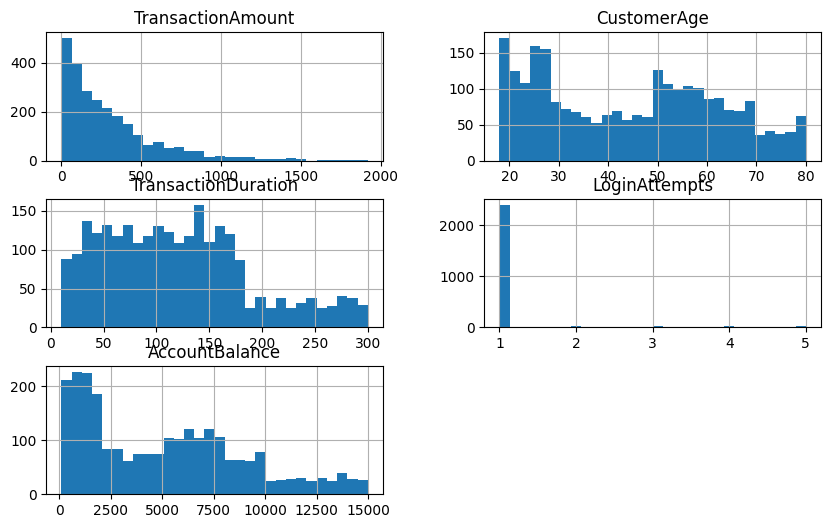

In [55]:
df.hist(figsize=(10, 6), bins=30)
plt.show()

In [56]:
numeric_df = df.select_dtypes(include=['number'])

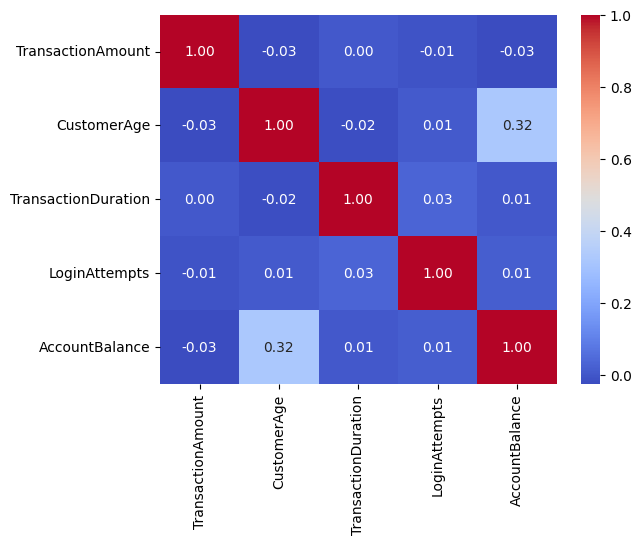

In [57]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

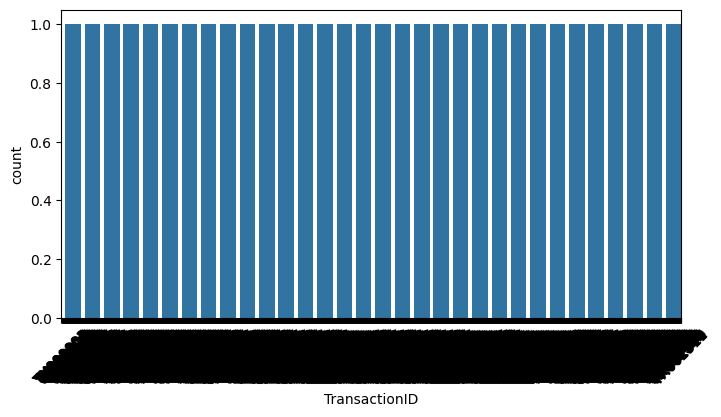

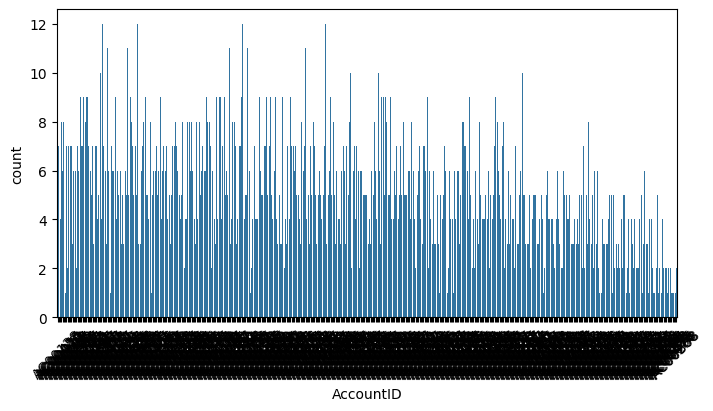

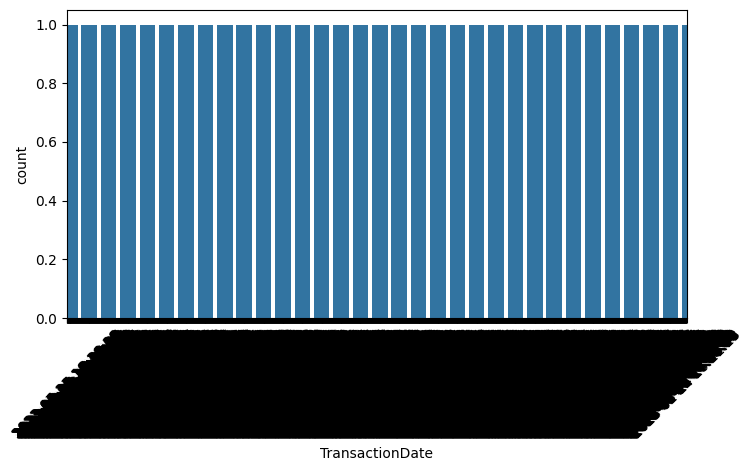

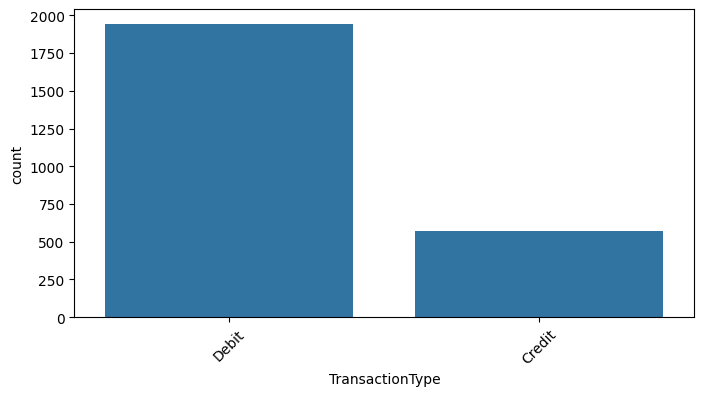

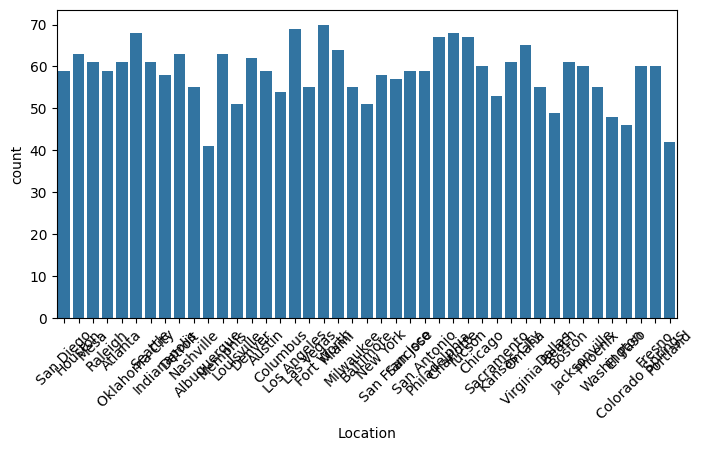

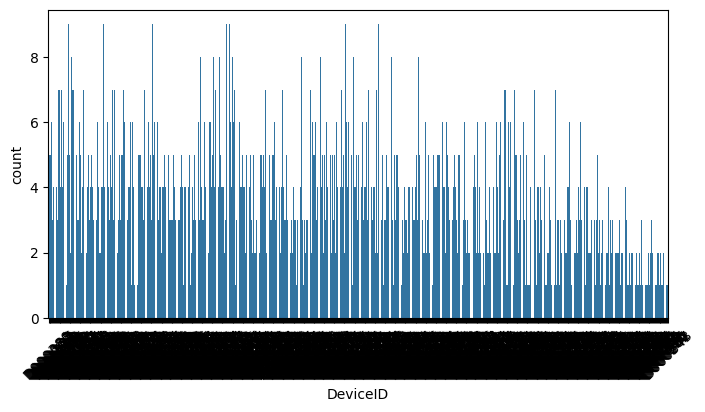

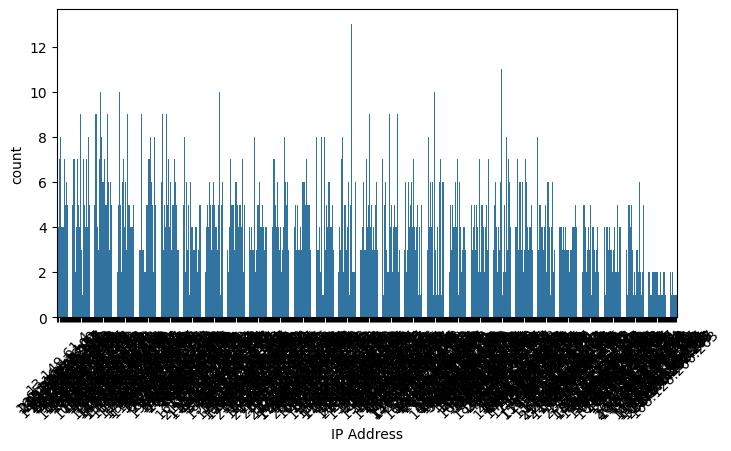

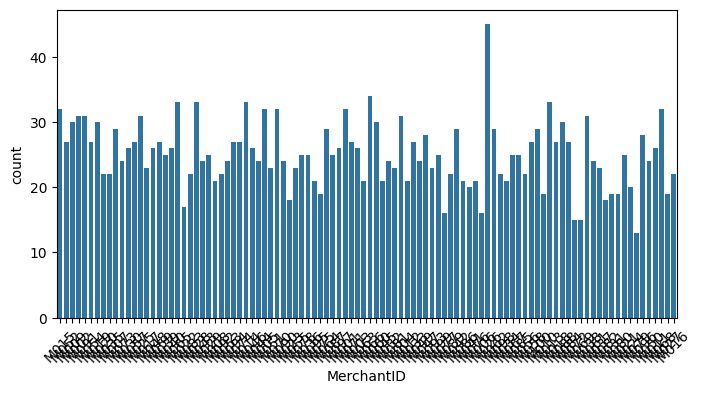

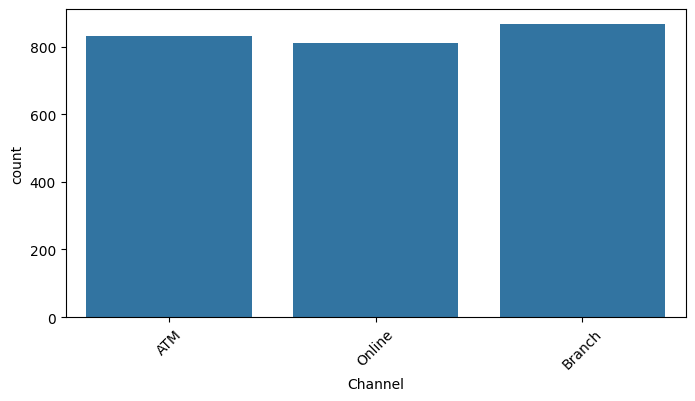

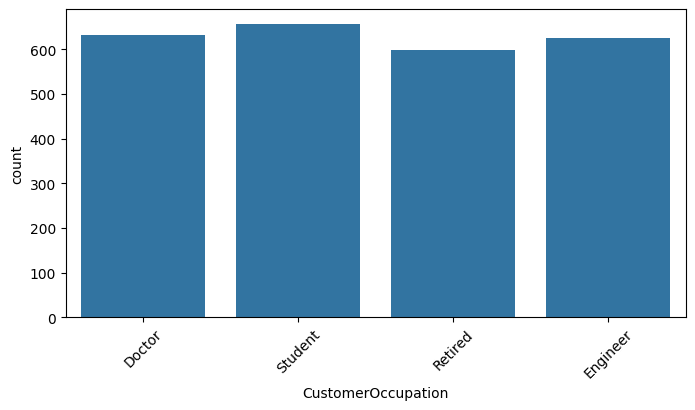

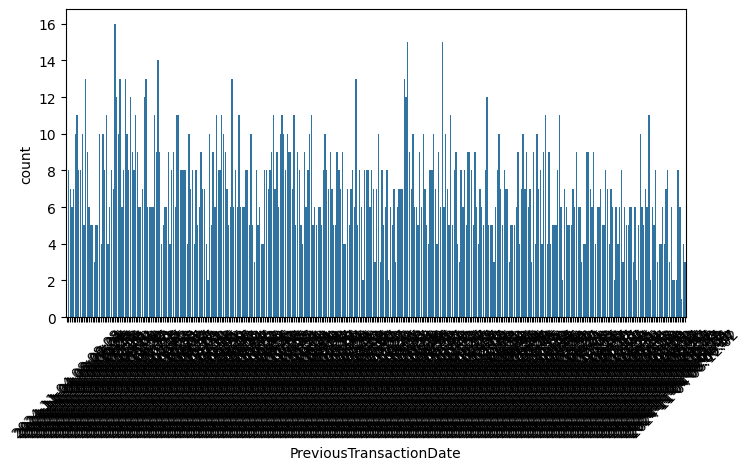

In [58]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [59]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [60]:
print(df.duplicated().sum())

0


In [61]:
# Menghapus kolom yang tidak relevan
df_clean = df.drop(columns=["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], errors='ignore')
# Mengubah tanggal menjadi format datetime
date_cols = ["TransactionDate", "PreviousTransactionDate"]
for col in date_cols:
    if col in df_clean.columns:  # Pastikan kolom ada sebelum mengonversi
        df_clean[col] = pd.to_datetime(df_clean[col])
# Menghitung selisih waktu dalam hari jika kedua kolom ada
if all(col in df_clean.columns for col in date_cols):
    df_clean["DaysSinceLastTransaction"] = (df_clean["TransactionDate"] - df_clean["PreviousTransactionDate"]).dt.days
    df_clean = df_clean.drop(columns=date_cols)  # Menghapus kolom tanggal asli

In [62]:
# Encoding Data Kategorikal
categorical_cols = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [63]:
# Normalisasi
numerical_cols = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance", "DaysSinceLastTransaction"]
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [64]:
df_clean.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,-0.800526
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,-0.076554
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,0.045675
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,-0.574872
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,0.967094


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Coba beberapa nilai K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")  # Gunakan "auto" untuk kompatibilitas
    kmeans.fit(df_clean)  # Menggunakan df_clean yang sudah dinormalisasi
    wcss.append(kmeans.inertia_)  # Simpan nilai inertia (WCSS)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

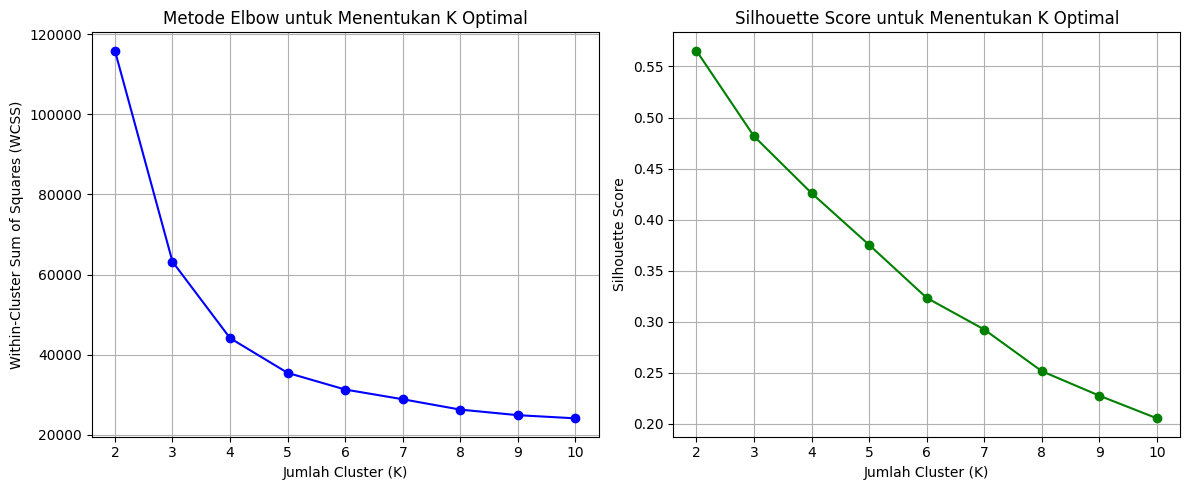

In [66]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Coba beberapa nilai K (Mulai dari 2 karena silhouette tidak bisa dihitung untuk K=1)
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    cluster_labels = kmeans.fit_predict(df_clean)  # Menggunakan df_clean yang sudah dinormalisasi

    wcss.append(kmeans.inertia_)  # Simpan nilai WCSS

    # Hitung silhouette score
    silhouette_avg = silhouette_score(df_clean, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Membuat dua subplot untuk Elbow Method dan Silhouette Score
plt.figure(figsize=(12, 5))

# Subplot Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Metode Elbow untuk Menentukan K Optimal")
plt.xticks(K_range)
plt.grid(True)

# Subplot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan K Optimal")
plt.xticks(K_range)
plt.grid(True)

plt.tight_layout()
plt.show()

In [67]:
# Melatih model K-Means dengan k=6
kmeans_final = KMeans(n_clusters=6, random_state=42, n_init=10)
df_clean["Cluster"] = kmeans_final.fit_predict(df_clean)
# Menampilkan distribusi cluster
df_clean["Cluster"].value_counts()

,count
Cluster,
2,477
5,424
3,406
4,404
0,401
1,400


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

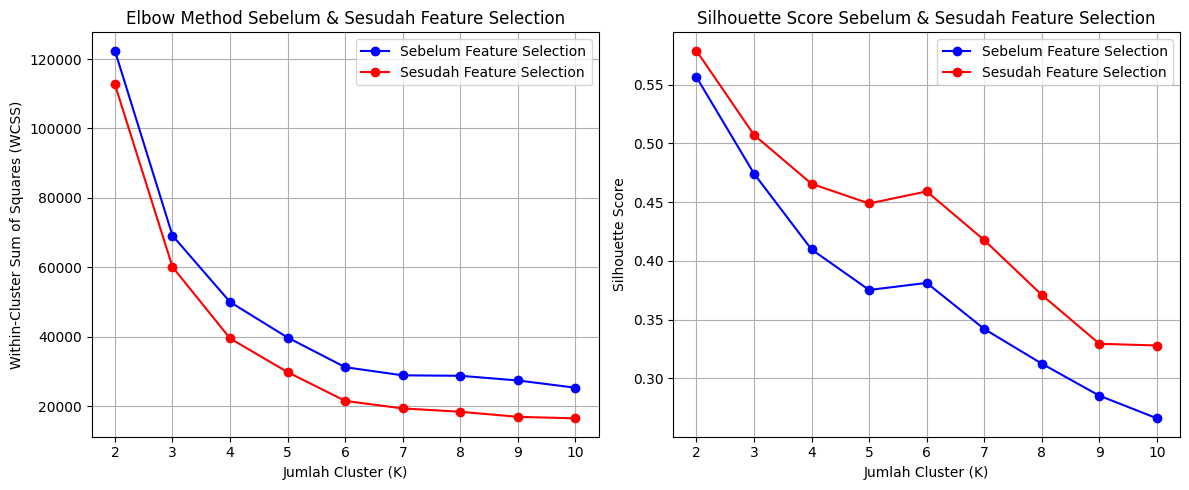

In [68]:
from sklearn.decomposition import PCA# Feature Selection dengan PCA**
pca = PCA(n_components=5)  # Pilih jumlah komponen utama yang optimal
df_pca = pca.fit_transform(df_clean)

# Evaluasi kembali model clustering**
wcss_before, silhouette_before = [], []
wcss_after, silhouette_after = [], []

K_range = range(2, 11)  # Mulai dari K=2 karena silhouette tidak bisa dihitung untuk K=1

for k in K_range:
    # Clustering sebelum feature selection
    kmeans_before = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels_before = kmeans_before.fit_predict(df_clean)
    wcss_before.append(kmeans_before.inertia_)
    silhouette_before.append(silhouette_score(df_clean, labels_before))

    # Clustering setelah feature selection (PCA)
    kmeans_after = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels_after = kmeans_after.fit_predict(df_pca)
    wcss_after.append(kmeans_after.inertia_)
    silhouette_after.append(silhouette_score(df_pca, labels_after))

# **3️⃣ Visualisasi Hasil Perbandingan**
plt.figure(figsize=(12, 5))

# Elbow Method sebelum & sesudah Feature Selection
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss_before, marker='o', linestyle='-', color='b', label='Sebelum Feature Selection')
plt.plot(K_range, wcss_after, marker='o', linestyle='-', color='r', label='Sesudah Feature Selection')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method Sebelum & Sesudah Feature Selection")
plt.xticks(K_range)
plt.legend()
plt.grid(True)

# Silhouette Score sebelum & sesudah Feature Selection
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_before, marker='o', linestyle='-', color='b', label='Sebelum Feature Selection')
plt.plot(K_range, silhouette_after, marker='o', linestyle='-', color='r', label='Sesudah Feature Selection')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Sebelum & Sesudah Feature Selection")
plt.xticks(K_range)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

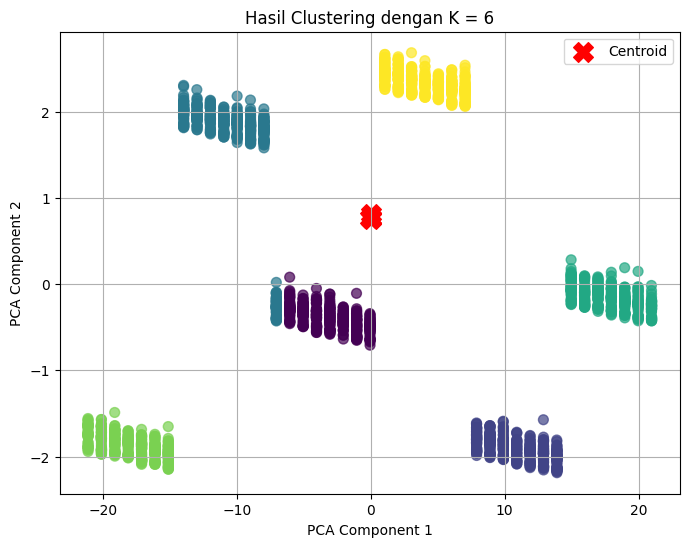

In [69]:
# Langkah 1: Reduksi dimensi ke 2 komponen (2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clean)

# Langkah 2: Melatih KMeans dengan K optimal
k_optimal = 6  # sesuaikan dengan hasil sebelumnya
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(df_clean)

# Langkah 3: Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroid')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Hasil Clustering dengan K = {k_optimal}')
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [71]:
# Inverse transform fitur kategorikal
for col in categorical_cols:
    df_clean[col] = label_encoders[col].inverse_transform(df_clean[col])

# Inverse transform fitur numerik yang telah dinormalisasi
df_original = df.copy()  # Membuat salinan dataset asli untuk ditambahkan hasil inverse
df_original[numerical_cols] = scaler.inverse_transform(df_clean[numerical_cols])

# Menambahkan hasil cluster ke dataset asli
df_original["Cluster"] = df_clean["Cluster"]

# Menampilkan beberapa baris pertama dari dataset asli yang telah diperbarui
df_original.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DaysSinceLastTransaction,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,-573.0,3
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,-496.0,2
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,-483.0,5
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,-549.0,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,-385.0,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Karakteristik Cluster 0:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         401.000000   401.000000           401.000000     401.000000   
mean          286.442444    44.558603           118.122195       1.099751   
std           277.081393    18.574369            68.334307       0.538540   
min             0.320000    18.000000            10.000000       1.000000   
25%            75.770000    26.000000            64.000000       1.000000   
50%           206.250000    46.000000           111.000000       1.000000   
75%           410.490000    60.000000           159.000000       1.000000   
max          1431.330000    80.000000           300.000000       5.000000   

       AccountBalance  DaysSinceLastTransaction  Cluster  
count      401.000000                401.000000    401.0  
mean      4953.526284               -492.957606      0.0  
std       3761.521121                106.277306      0.0  
min        129.290000               -672.000

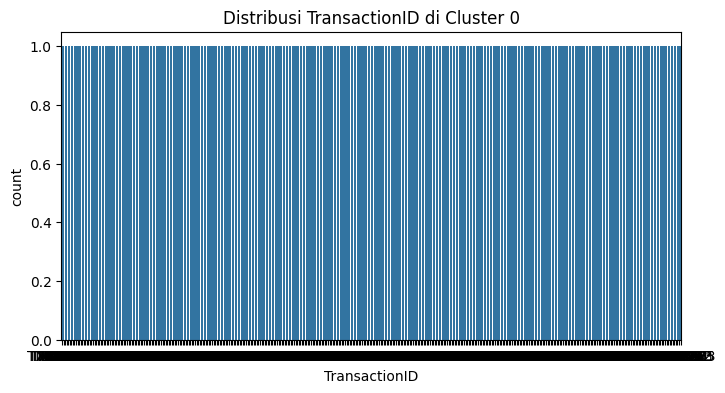

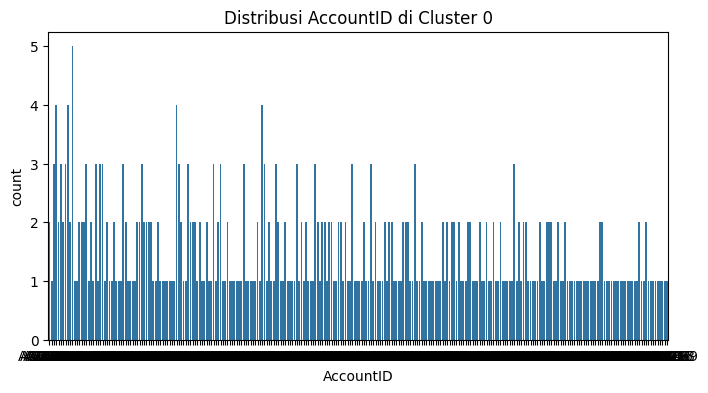

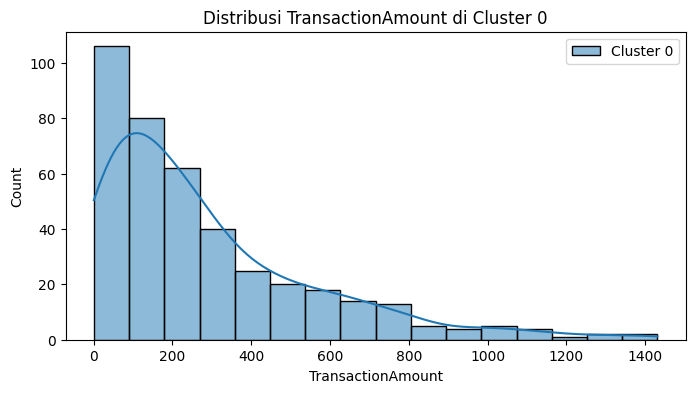

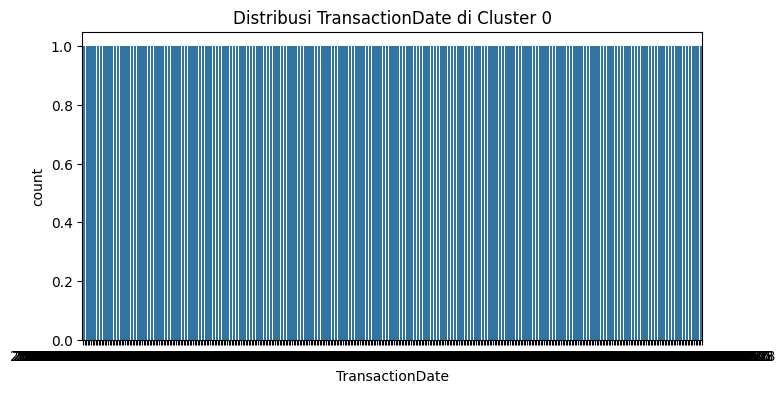

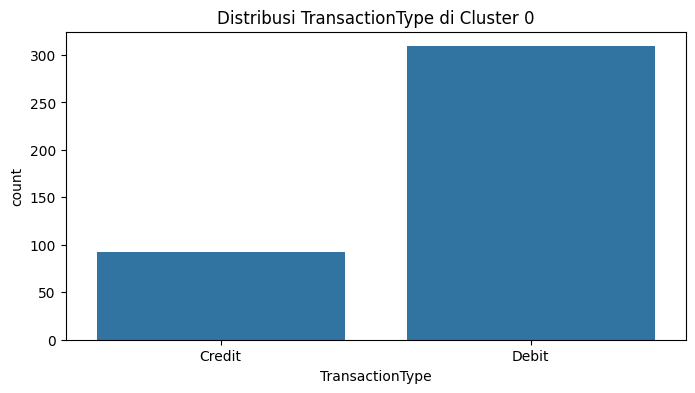

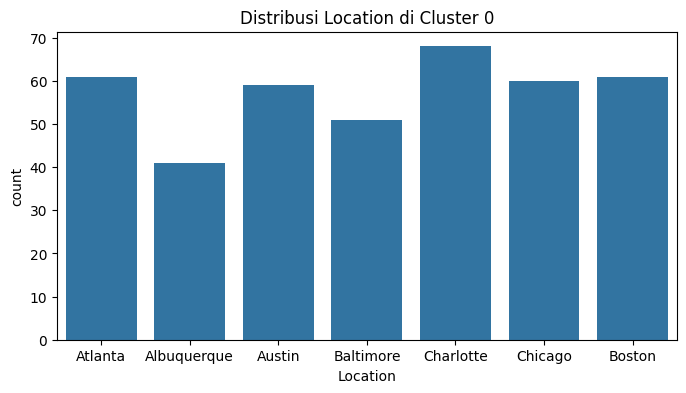

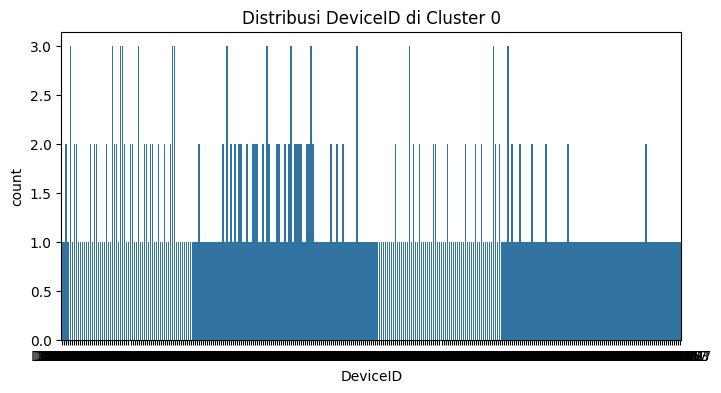

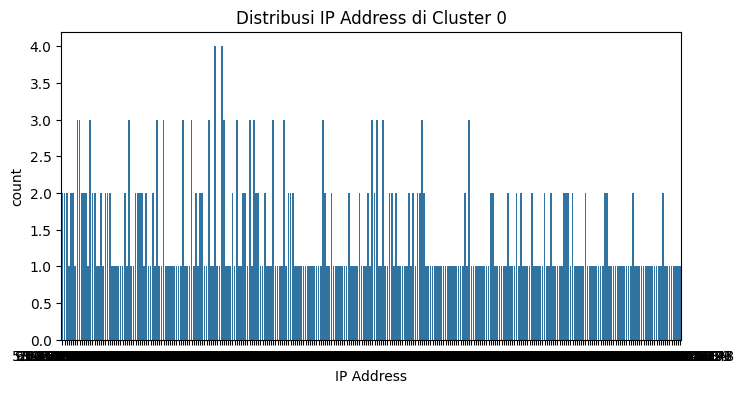

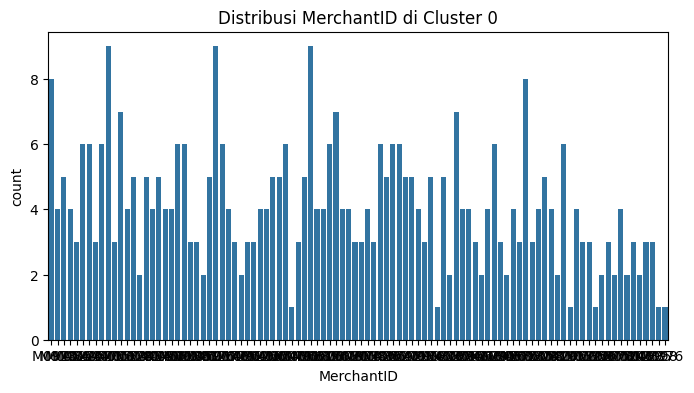

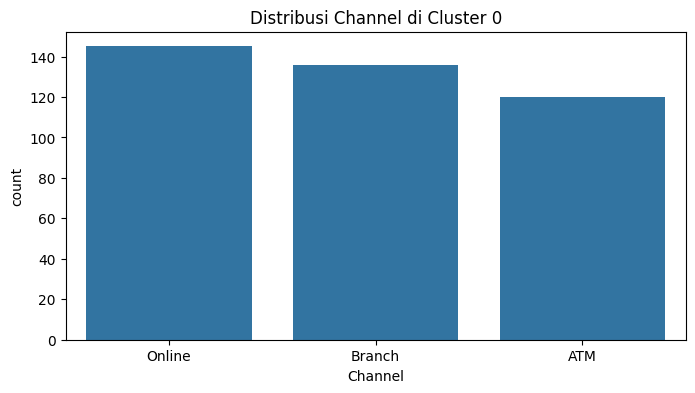

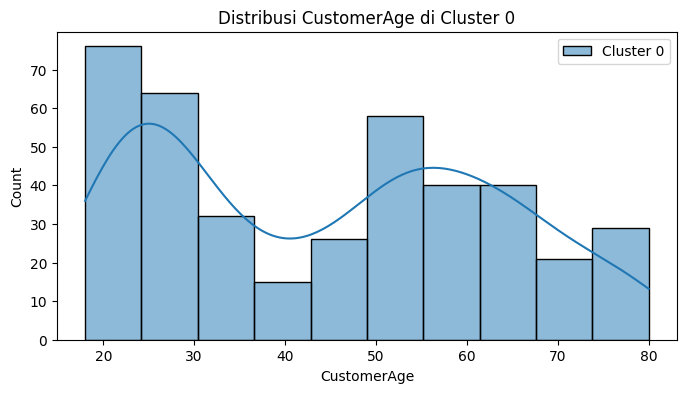

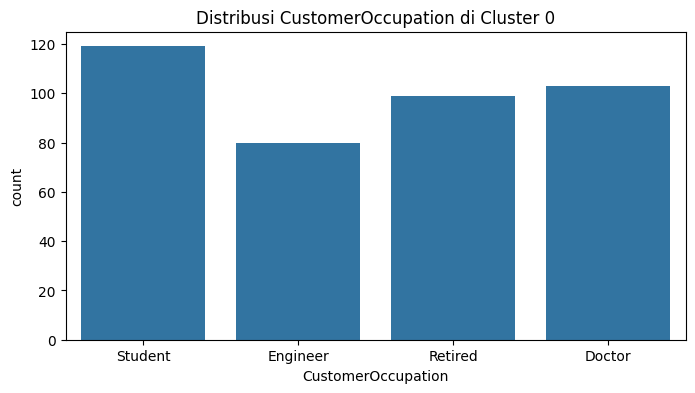

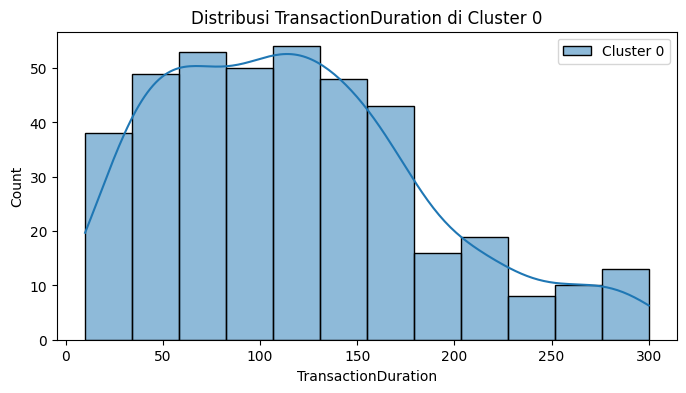

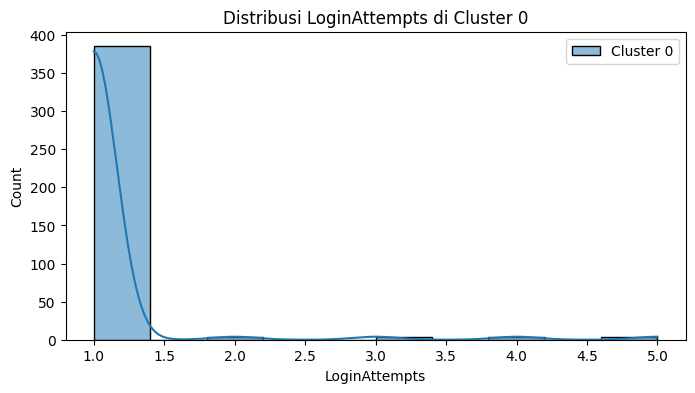

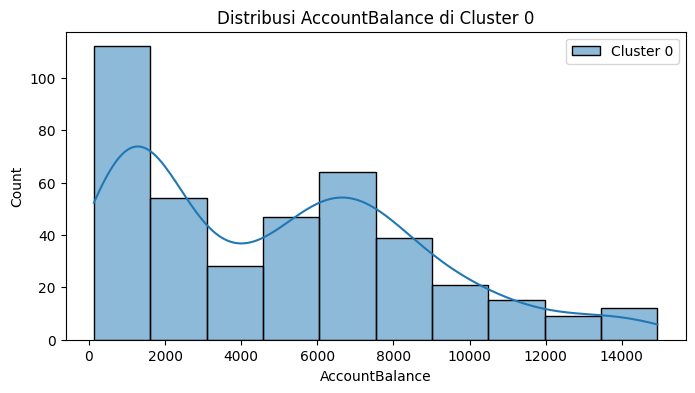

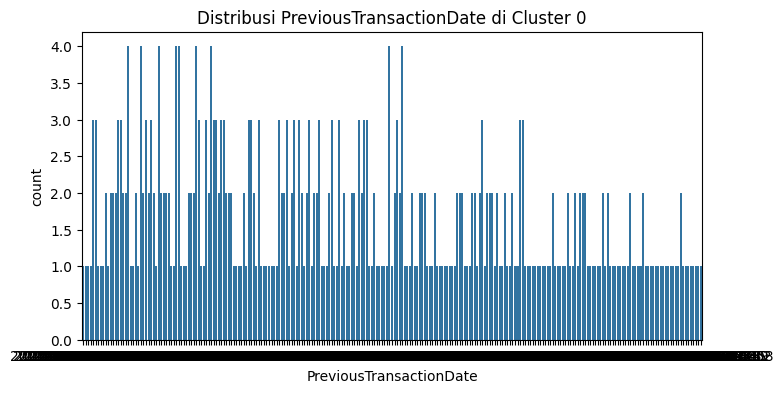

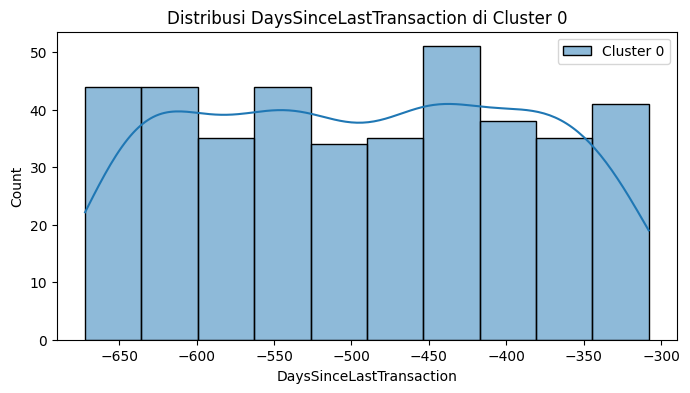


Karakteristik Cluster 1:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         400.000000    400.00000           400.000000     400.000000   
mean          301.400100     45.13750           120.277500       1.077500   
std           315.331069     17.84867            65.426195       0.465872   
min             1.410000     18.00000            12.000000       1.000000   
25%            84.985000     27.00000            67.500000       1.000000   
50%           199.865000     47.00000           118.000000       1.000000   
75%           378.957500     59.00000           161.000000       1.000000   
max          1919.110000     80.00000           296.000000       5.000000   

       AccountBalance  DaysSinceLastTransaction  Cluster  
count      400.000000                400.000000    400.0  
mean      5049.752225               -486.675000      1.0  
std       3887.107773                106.355645      0.0  
min        137.420000               -672.000

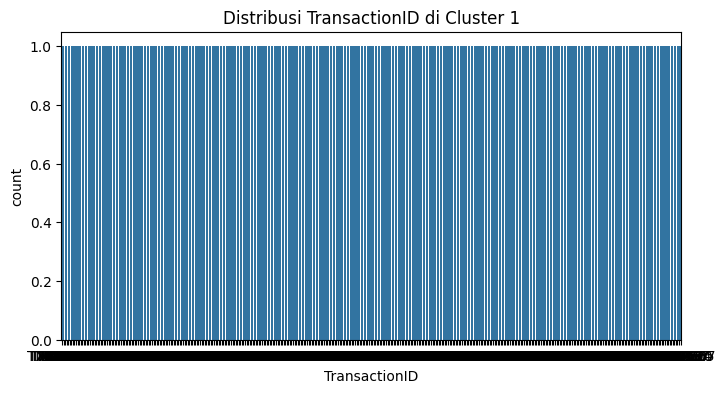

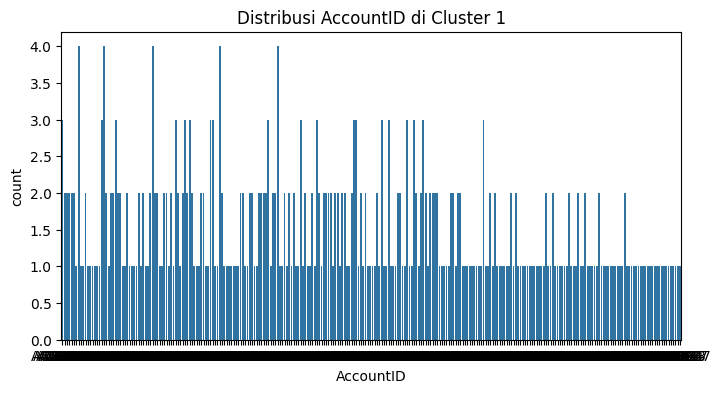

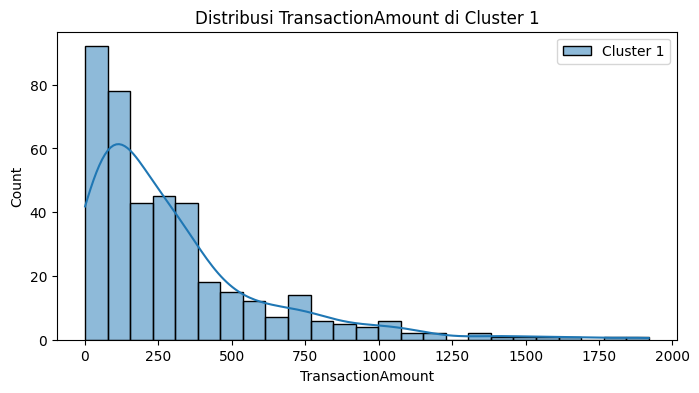

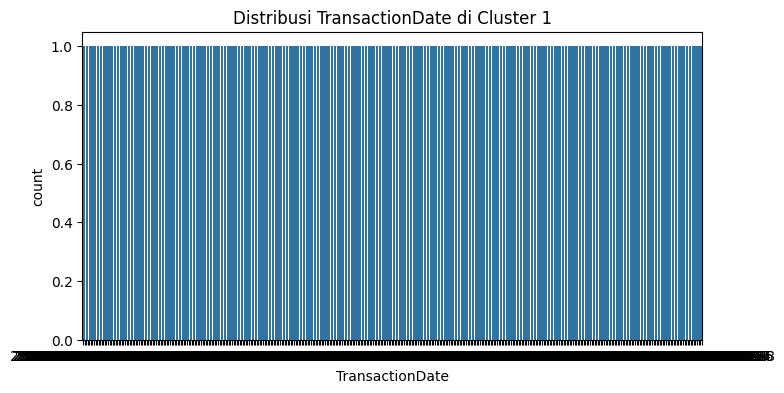

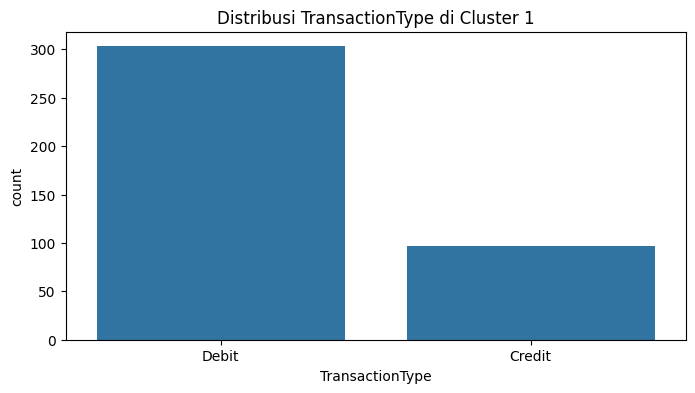

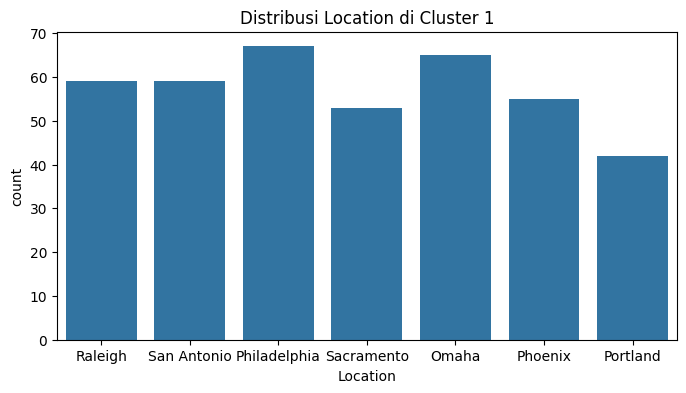

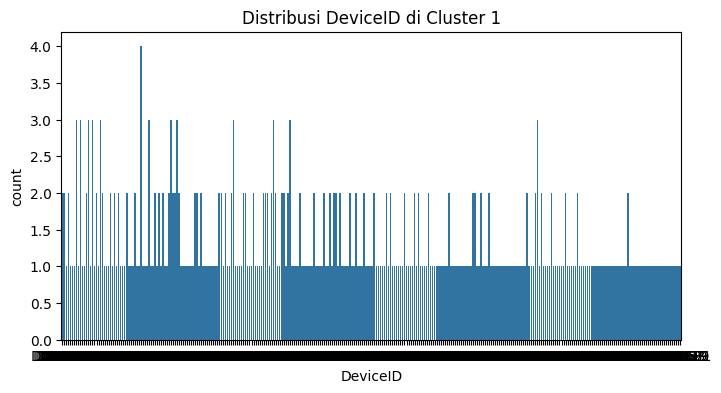

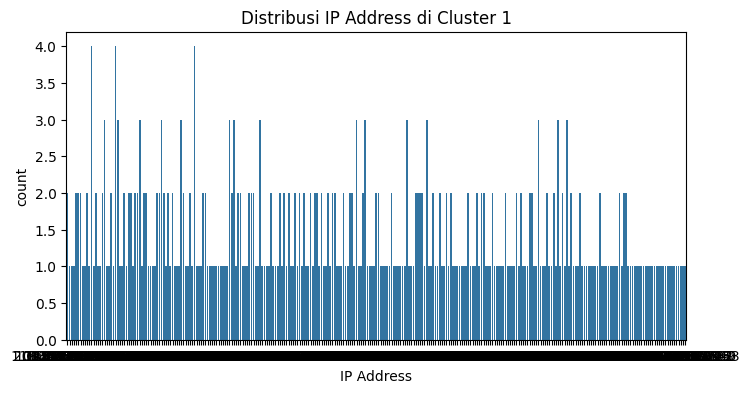

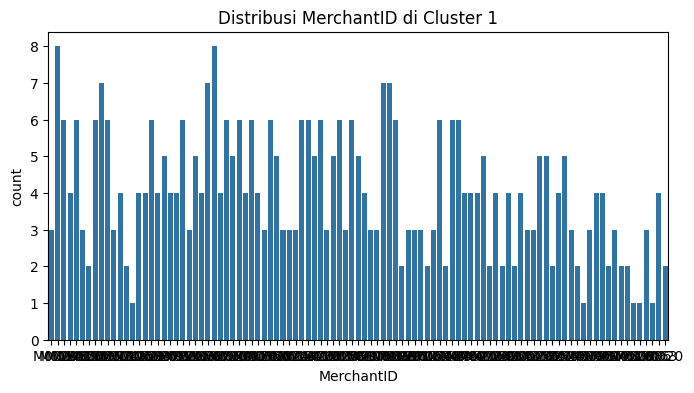

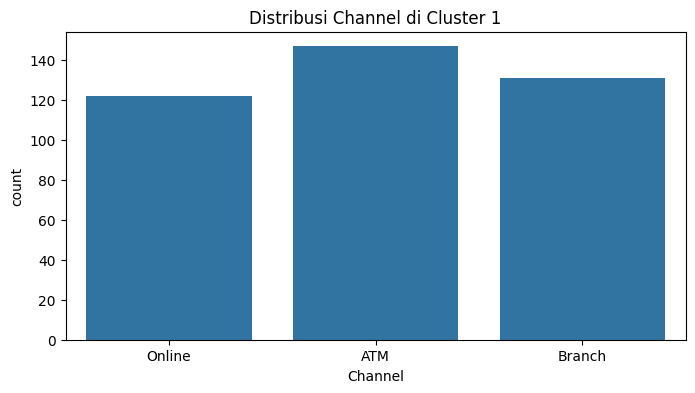

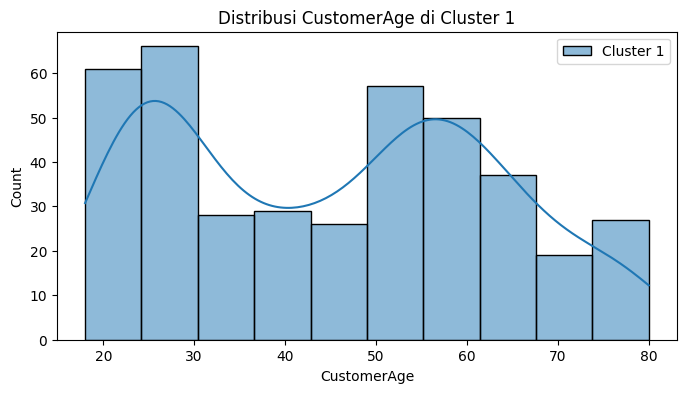

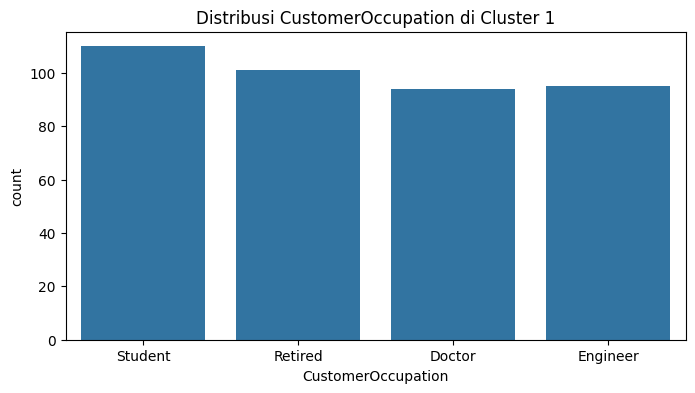

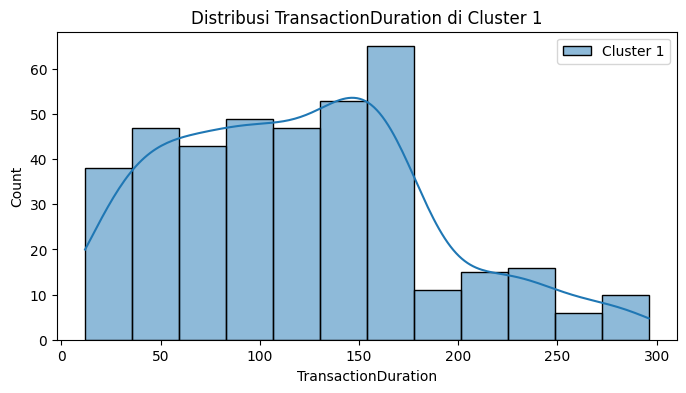

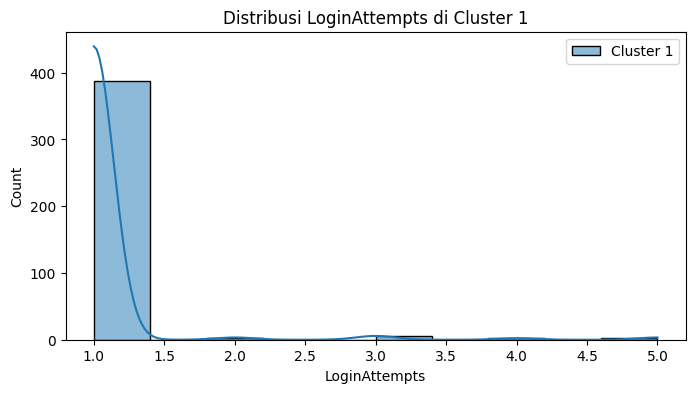

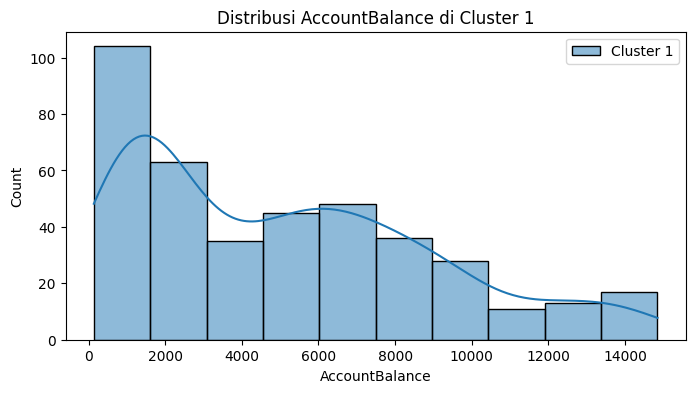

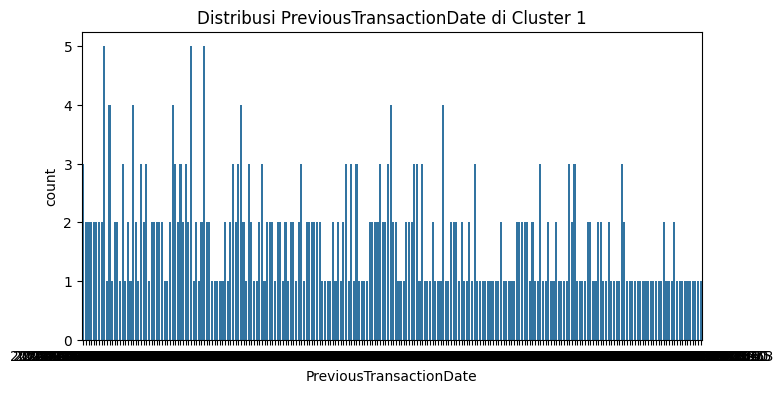

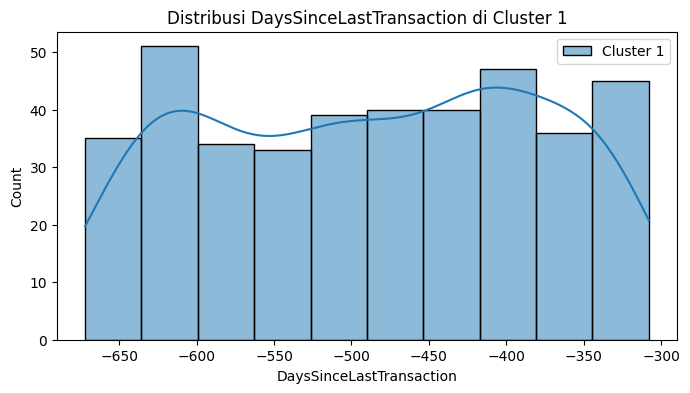


Karakteristik Cluster 2:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         477.000000   477.000000           477.000000     477.000000   
mean          289.785577    45.241090           123.844864       1.153040   
std           280.585410    17.214616            73.233776       0.682661   
min             0.450000    18.000000            10.000000       1.000000   
25%            73.880000    28.000000            65.000000       1.000000   
50%           211.910000    46.000000           119.000000       1.000000   
75%           425.910000    59.000000           164.000000       1.000000   
max          1647.740000    80.000000           299.000000       5.000000   

       AccountBalance  DaysSinceLastTransaction  Cluster  
count      477.000000                477.000000    477.0  
mean      5078.535220               -490.865828      2.0  
std       3874.746293                103.526835      0.0  
min        101.250000               -672.000

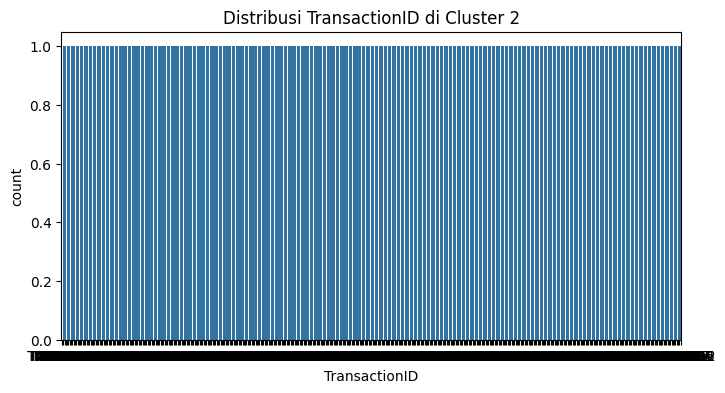

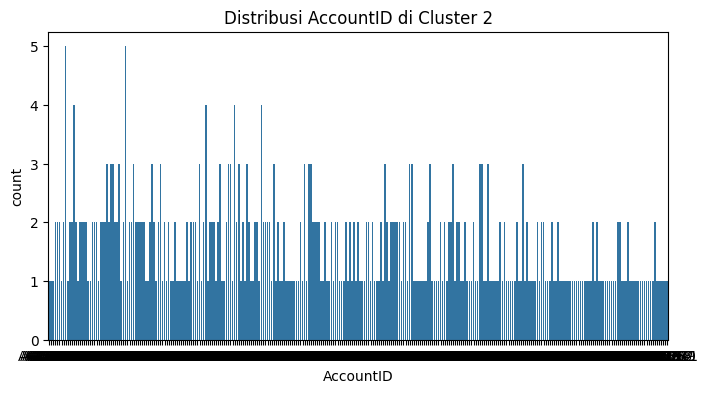

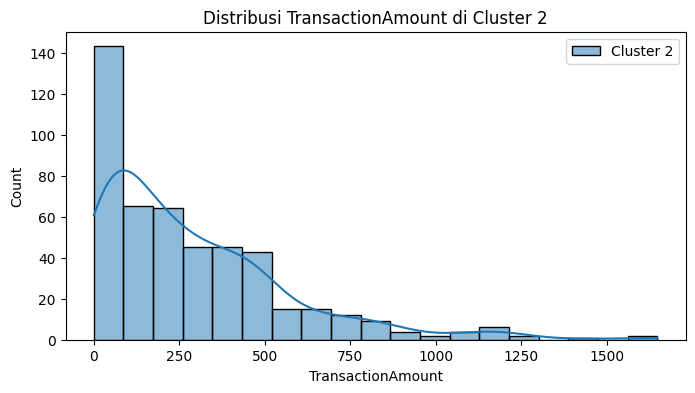

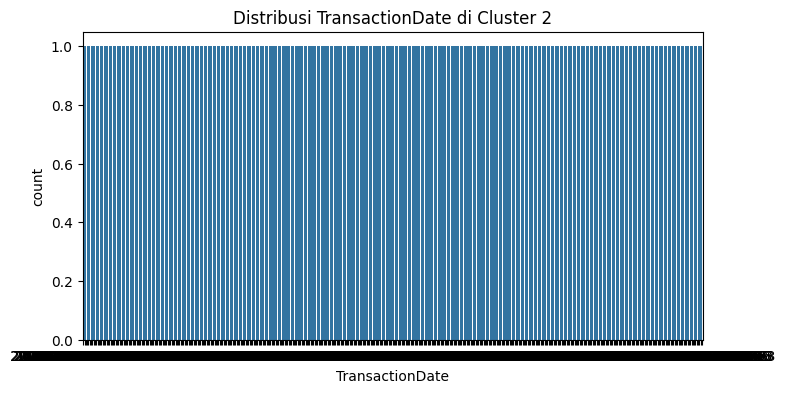

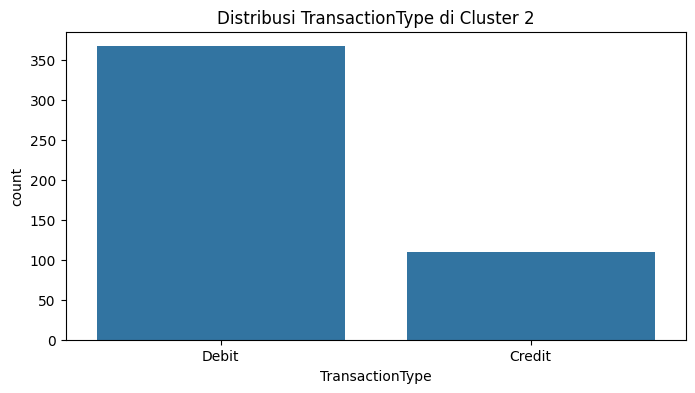

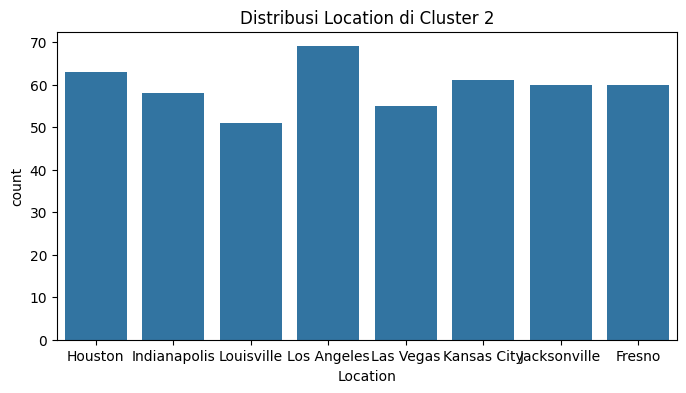

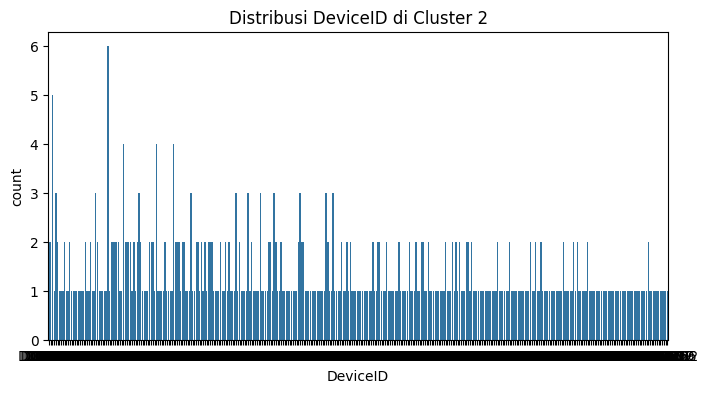

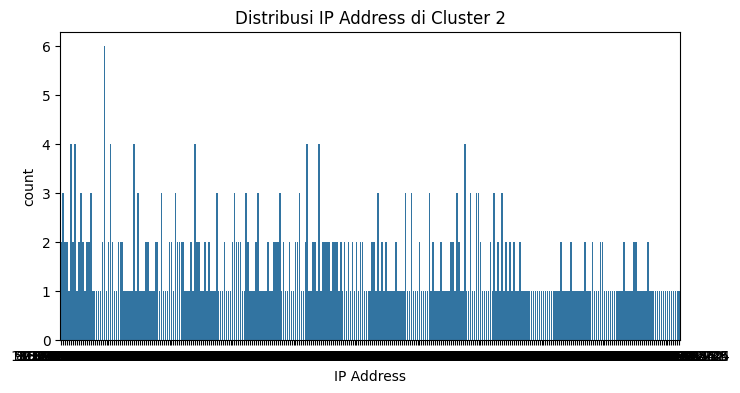

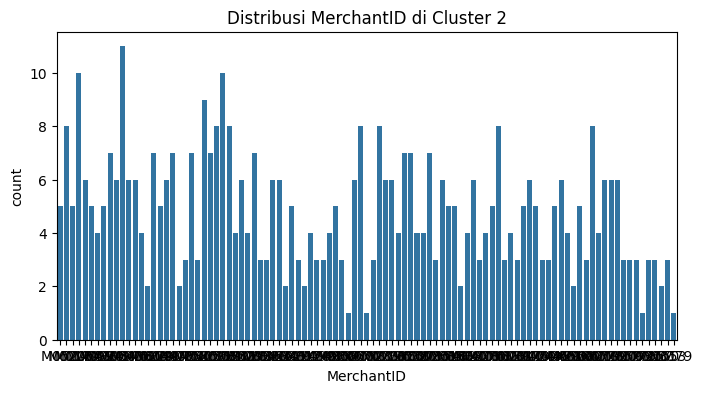

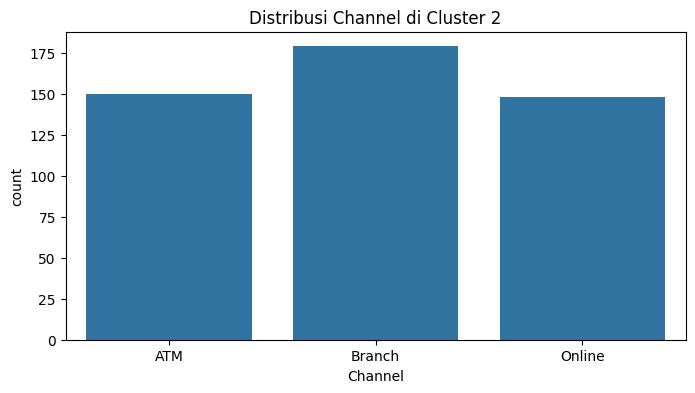

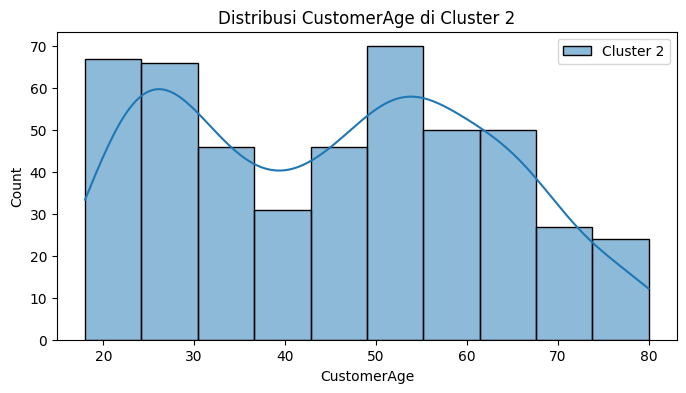

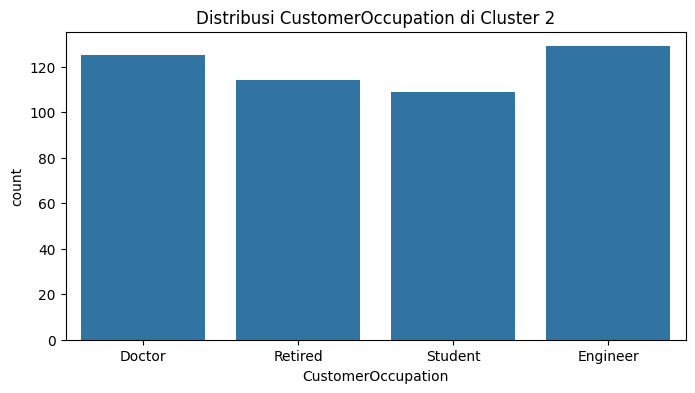

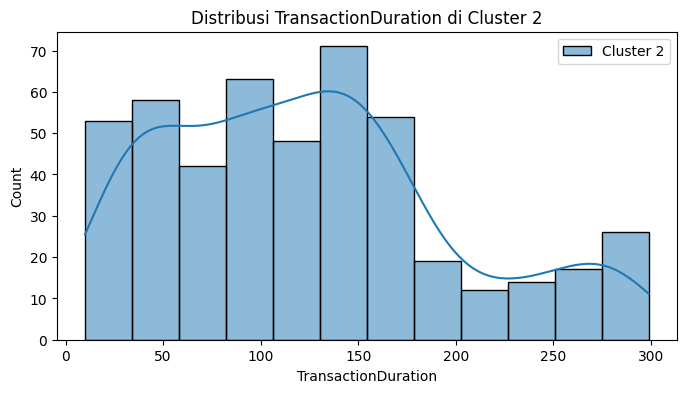

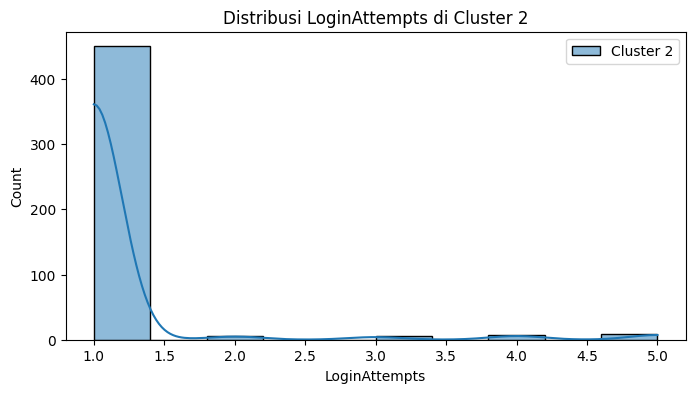

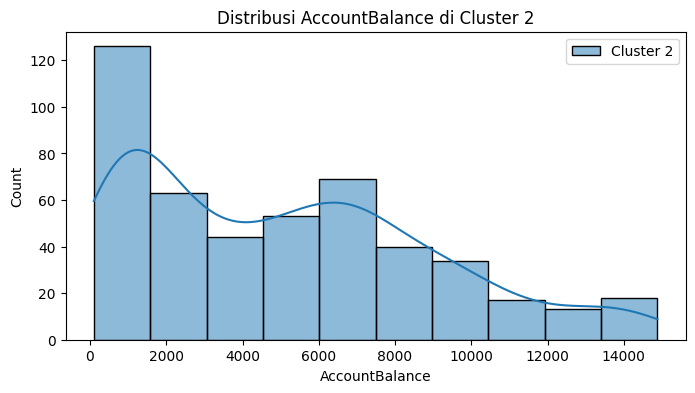

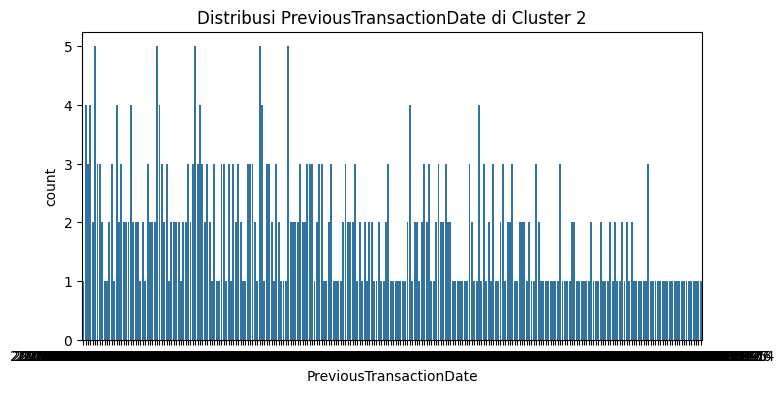

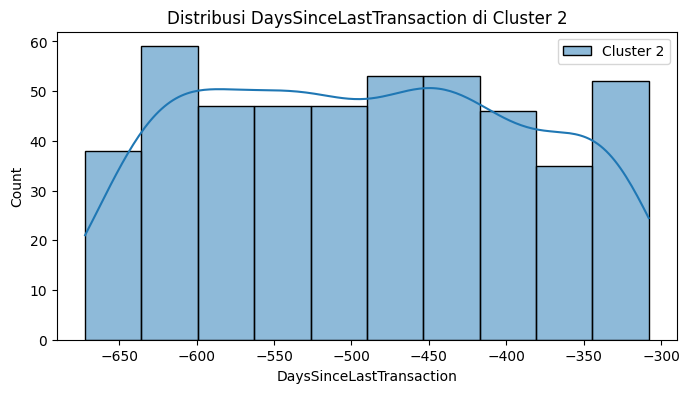


Karakteristik Cluster 3:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         406.000000   406.000000           406.000000     406.000000   
mean          303.249433    42.706897           116.756158       1.115764   
std           291.810229    17.257821            72.228767       0.607686   
min             1.820000    18.000000            10.000000       1.000000   
25%            85.370000    27.000000            54.000000       1.000000   
50%           204.310000    40.000000           107.000000       1.000000   
75%           434.027500    57.000000           159.000000       1.000000   
max          1531.310000    80.000000           296.000000       5.000000   

       AccountBalance  DaysSinceLastTransaction  Cluster  
count      406.000000                406.000000    406.0  
mean      5226.706207               -486.105911      3.0  
std       4073.024422                106.282740      0.0  
min        102.200000               -672.000

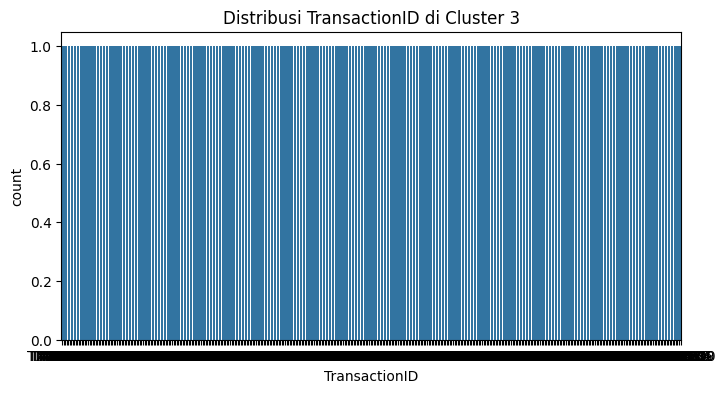

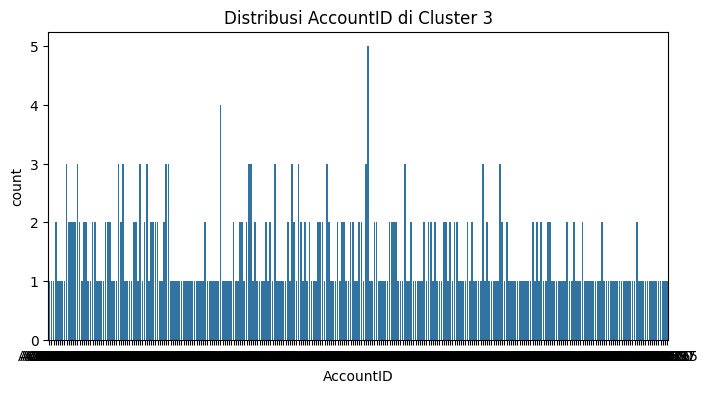

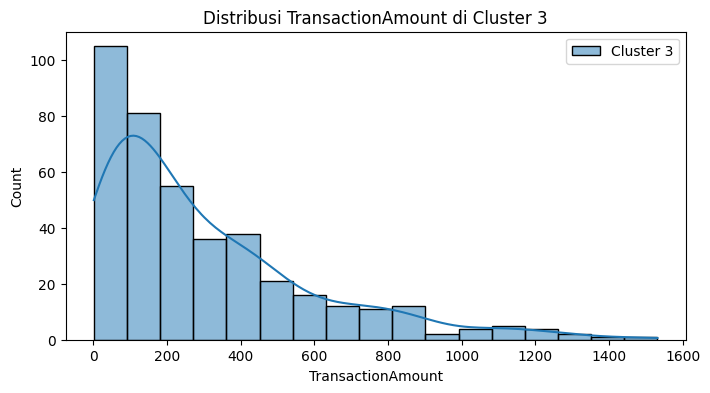

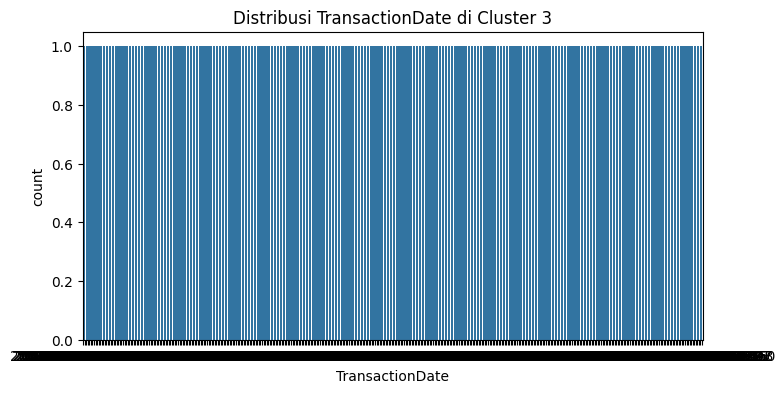

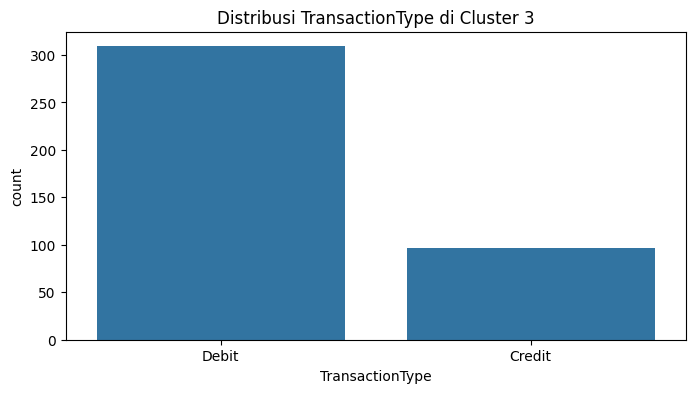

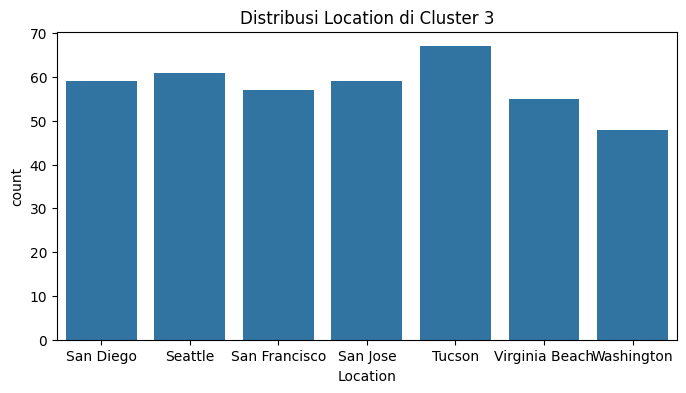

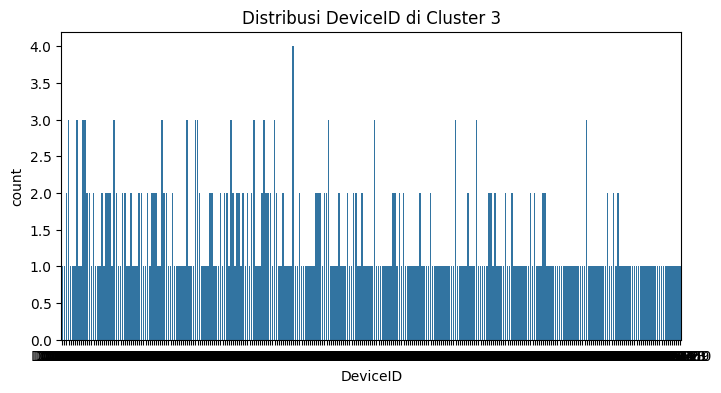

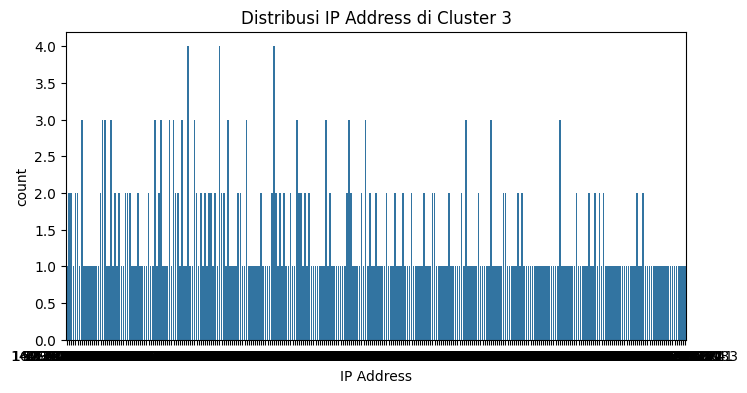

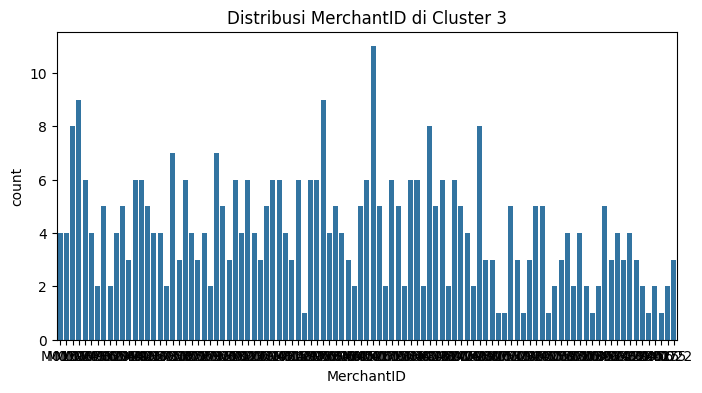

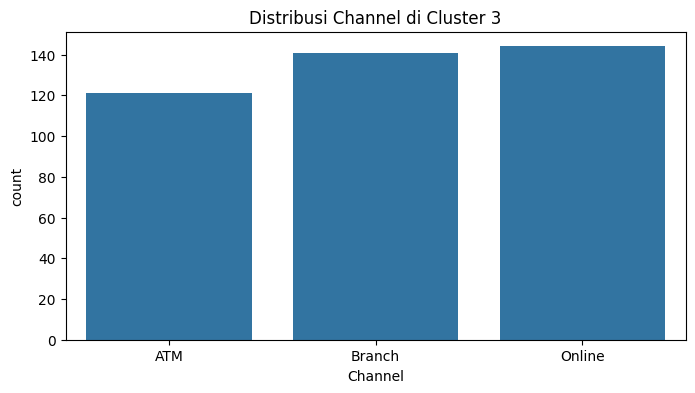

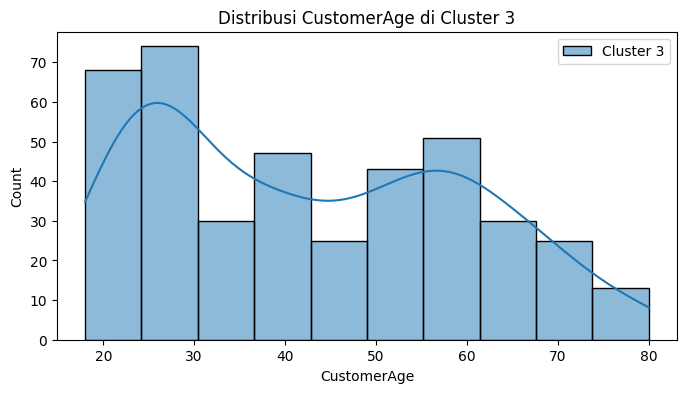

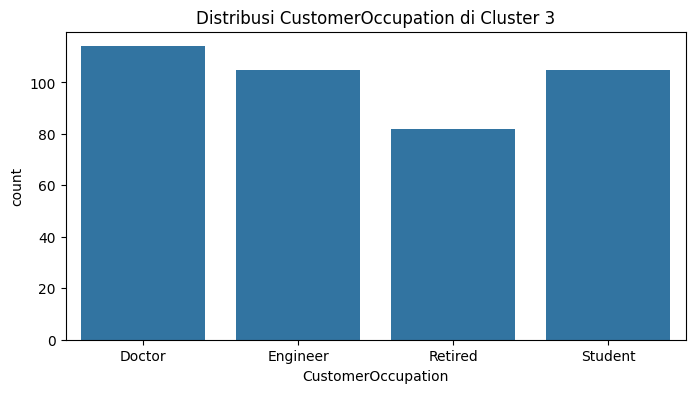

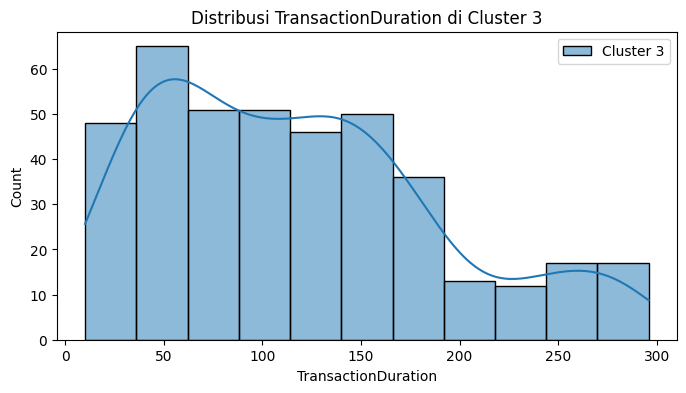

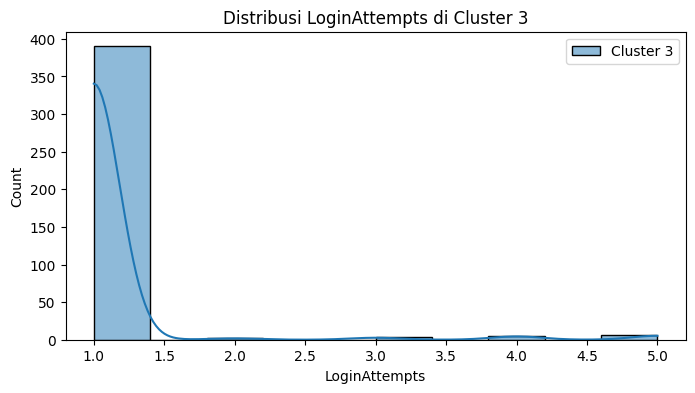

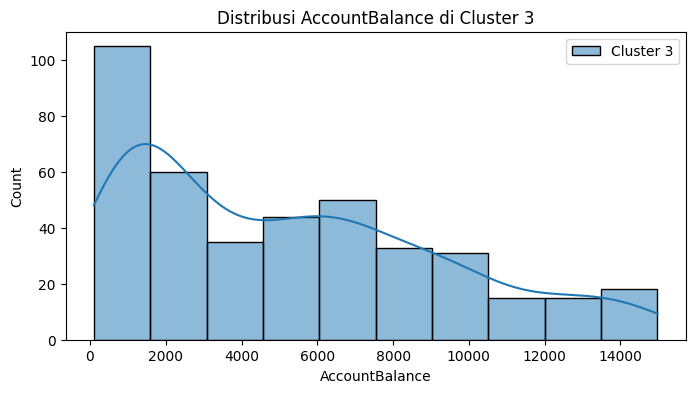

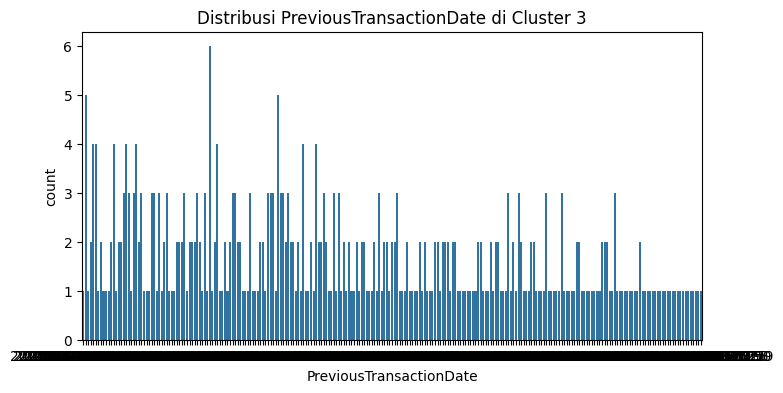

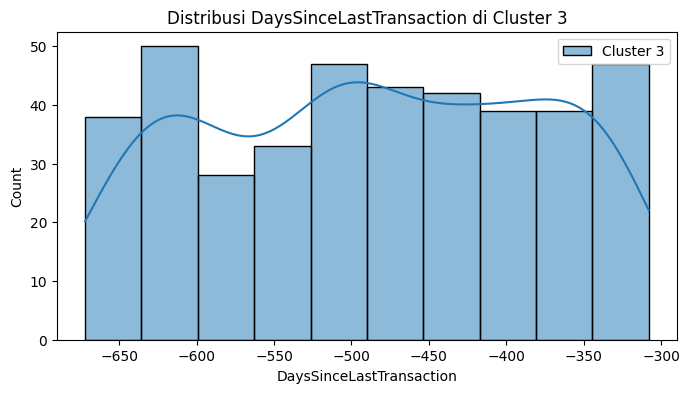


Karakteristik Cluster 4:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         404.000000   404.000000           404.000000     404.000000   
mean          307.816312    45.381188           120.321782       1.148515   
std           301.649587    17.931030            72.741941       0.632238   
min             0.860000    18.000000            11.000000       1.000000   
25%            86.610000    28.000000            61.000000       1.000000   
50%           222.940000    46.000000           113.500000       1.000000   
75%           392.980000    60.000000           165.000000       1.000000   
max          1831.020000    80.000000           297.000000       5.000000   

       AccountBalance  DaysSinceLastTransaction  Cluster  
count      404.000000                404.000000    404.0  
mean      5458.100248               -478.141089      4.0  
std       3969.772394                110.672084      0.0  
min        117.980000               -672.000

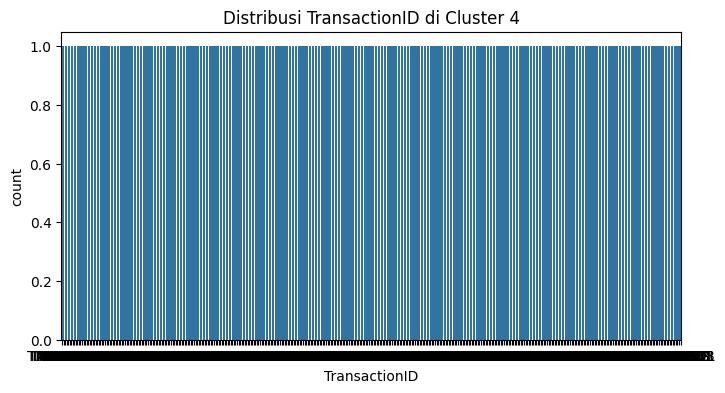

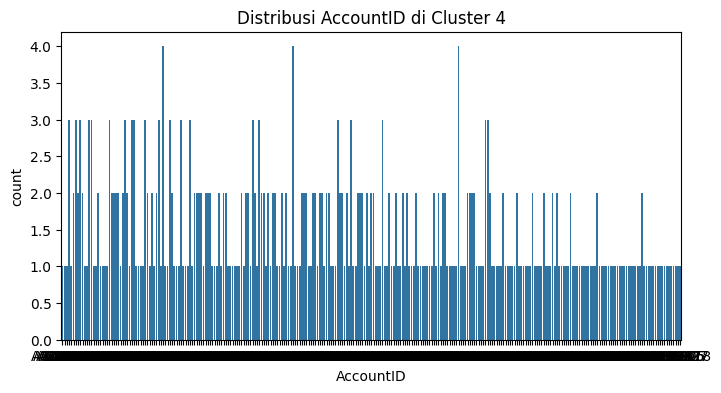

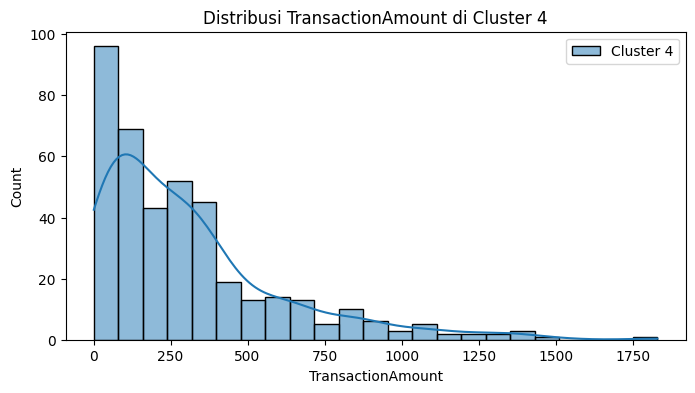

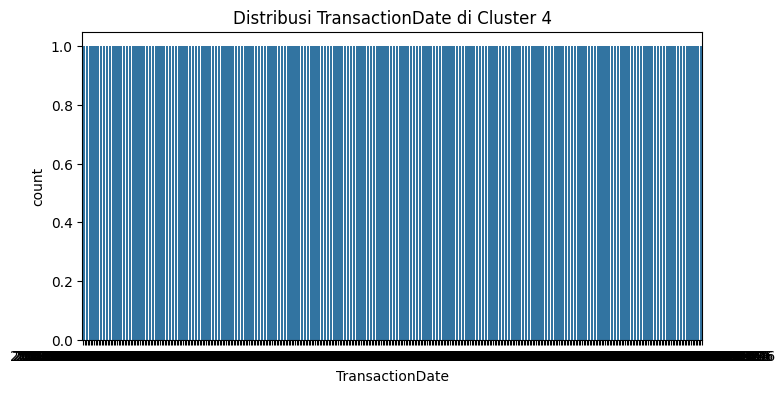

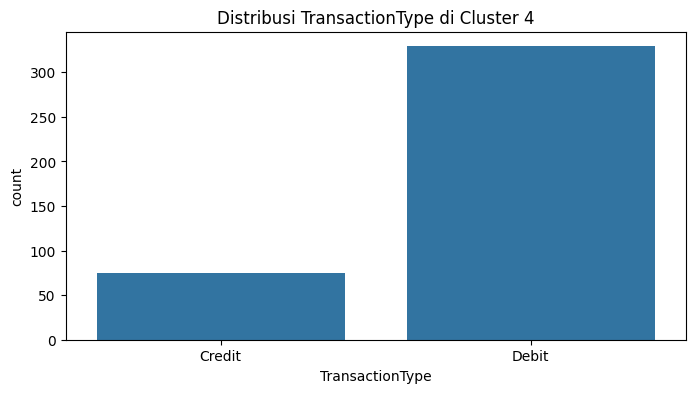

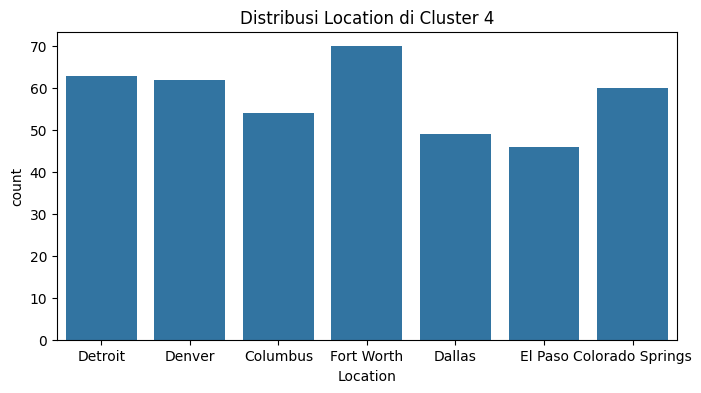

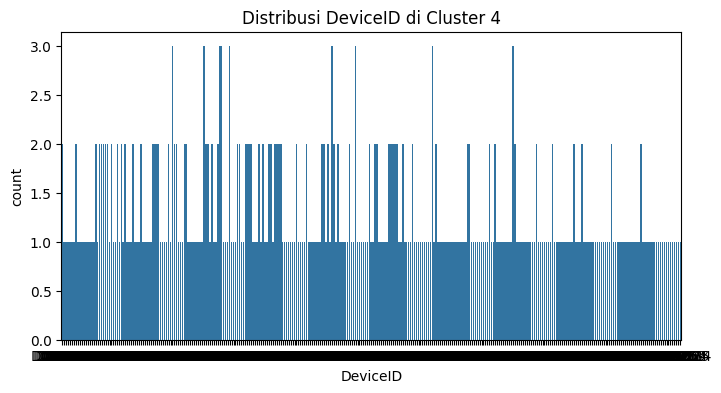

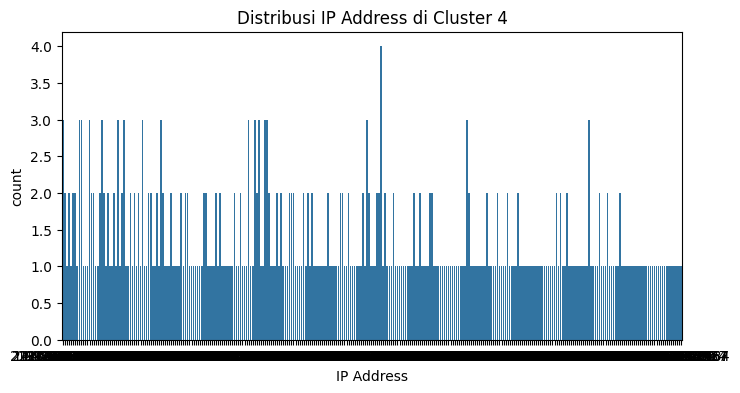

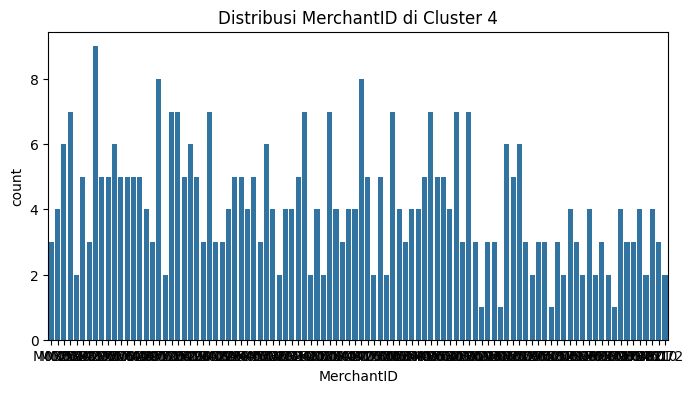

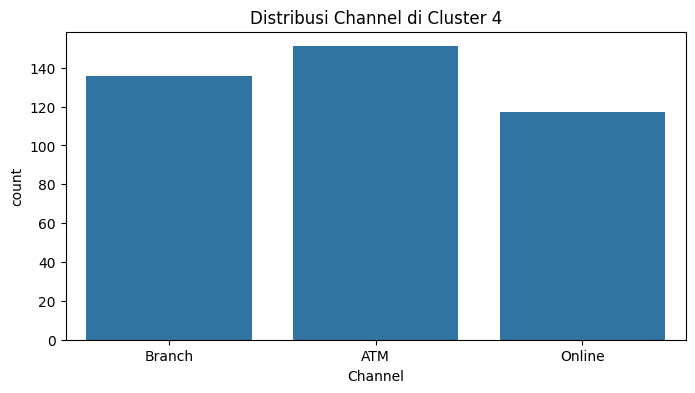

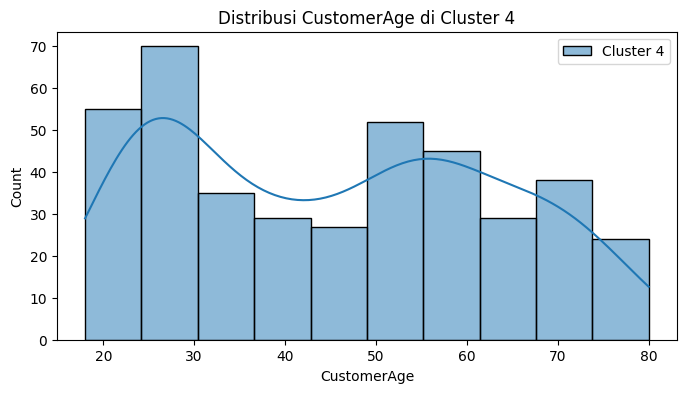

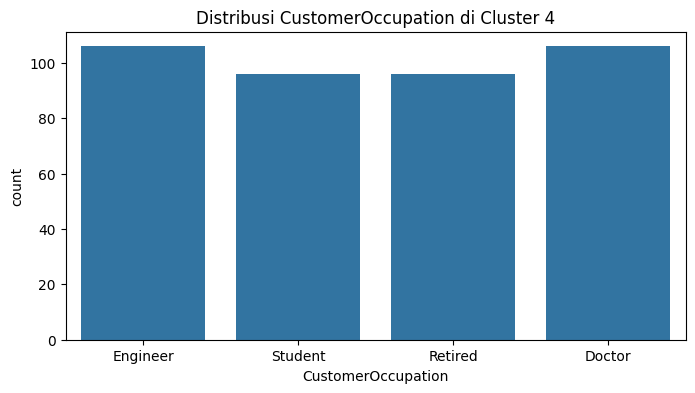

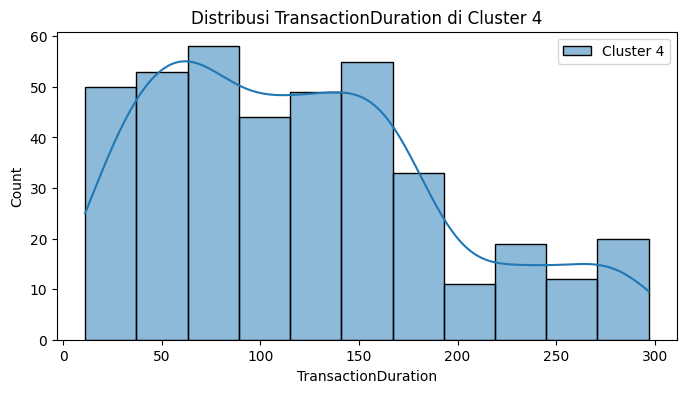

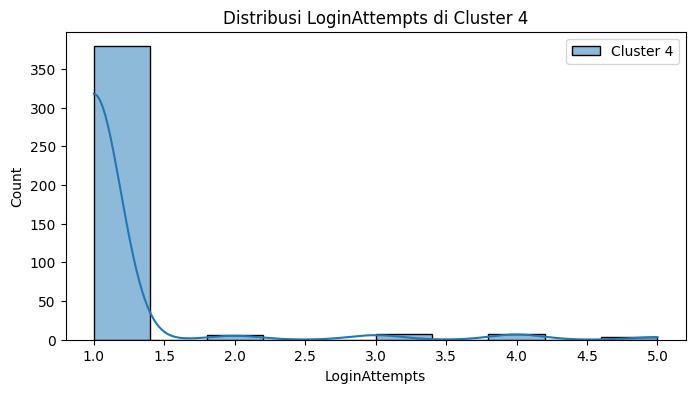

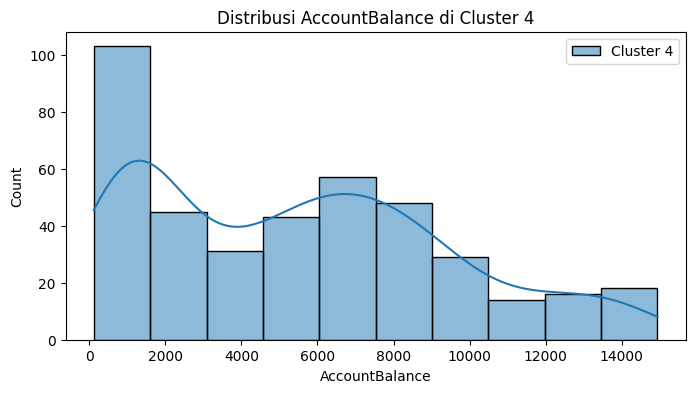

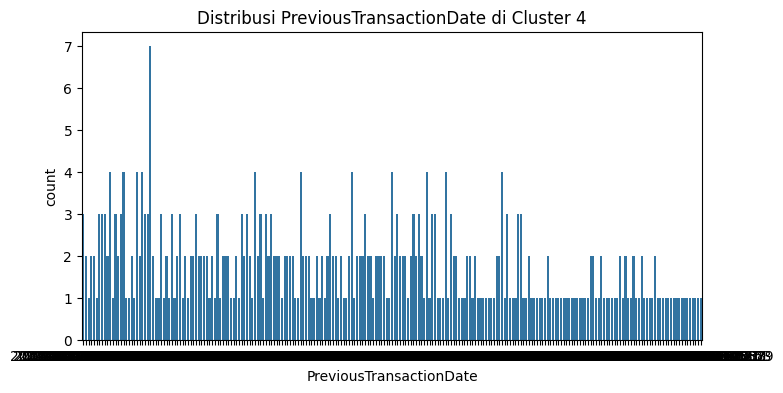

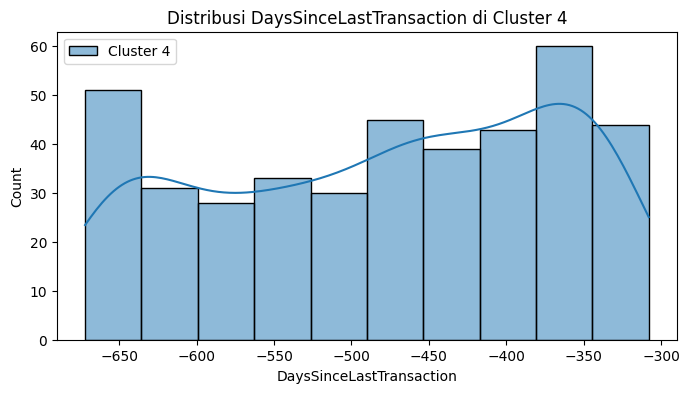


Karakteristik Cluster 5:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         424.000000   424.000000           424.000000     424.000000   
mean          298.177665    44.917453           117.875000       1.146226   
std           287.088936    17.962142            67.069393       0.643083   
min             0.260000    18.000000            10.000000       1.000000   
25%            91.762500    27.000000            65.000000       1.000000   
50%           209.420000    46.000000           109.000000       1.000000   
75%           398.920000    59.000000           158.250000       1.000000   
max          1762.280000    80.000000           300.000000       5.000000   

       AccountBalance  DaysSinceLastTransaction  Cluster  
count      424.000000                424.000000    424.0  
mean      4932.282075               -491.702830      5.0  
std       3836.700989                105.530547      0.0  
min        112.760000               -672.000

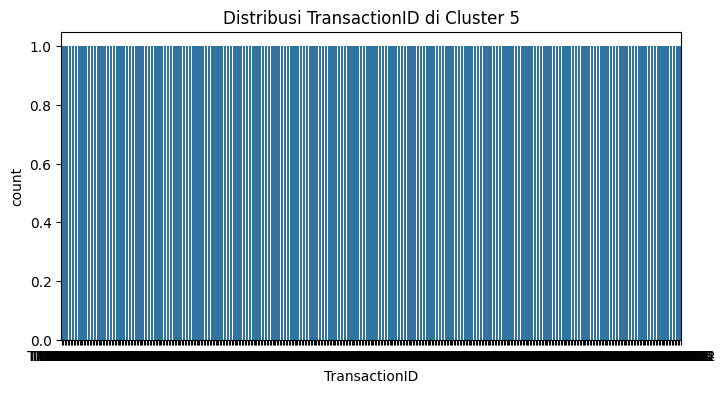

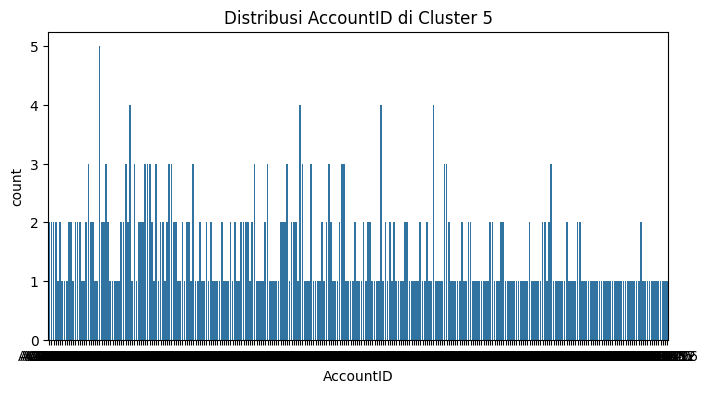

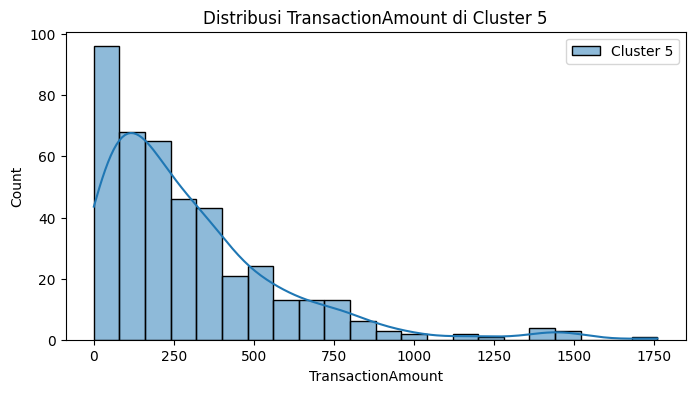

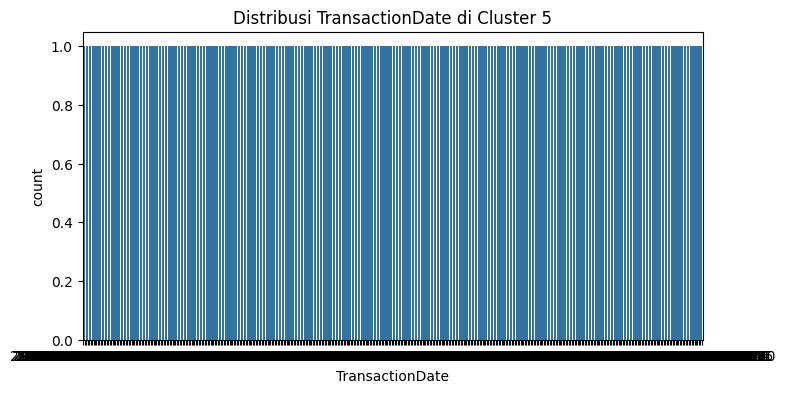

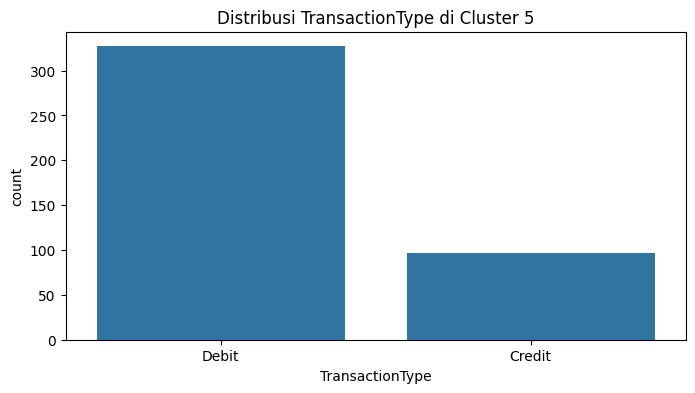

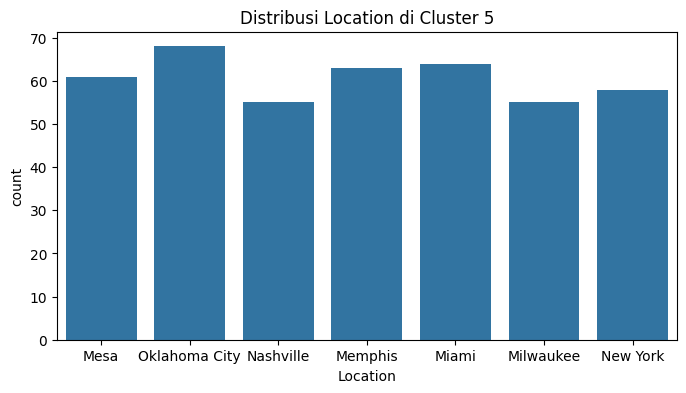

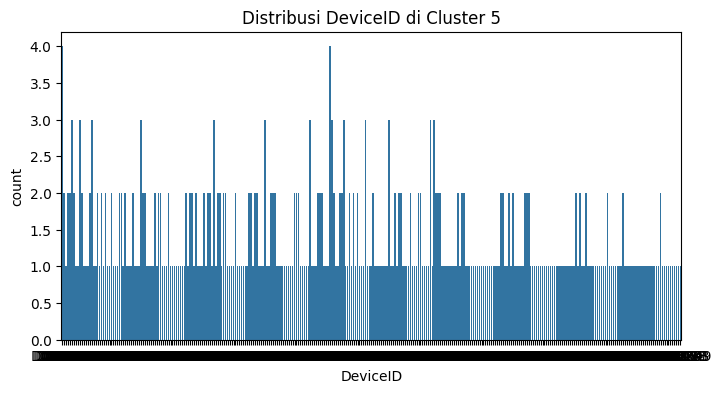

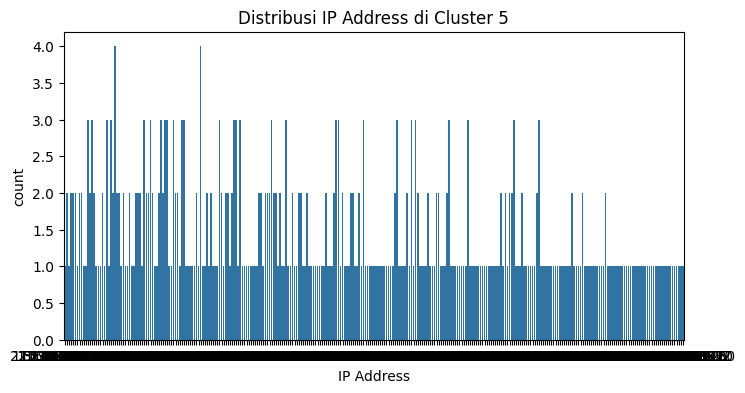

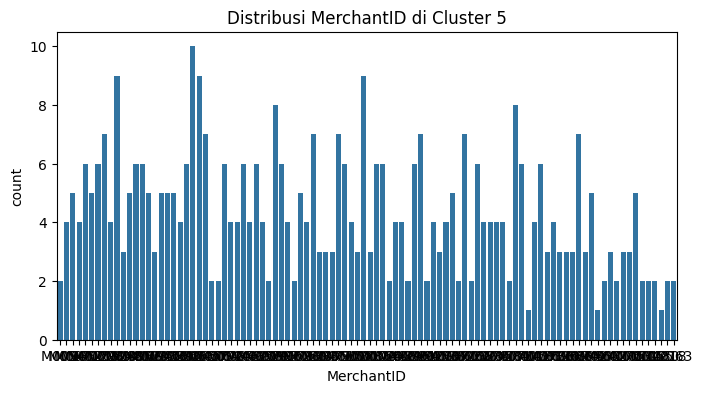

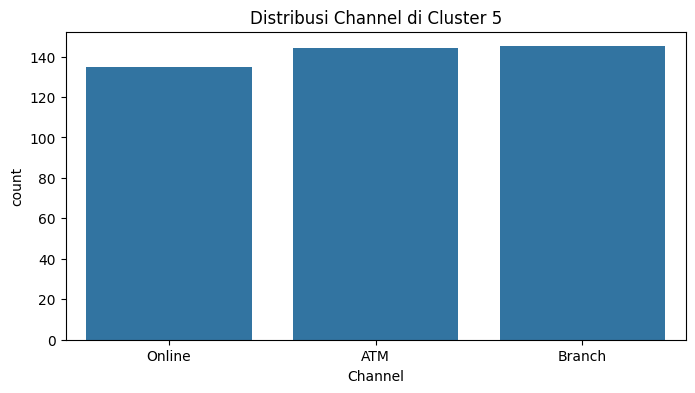

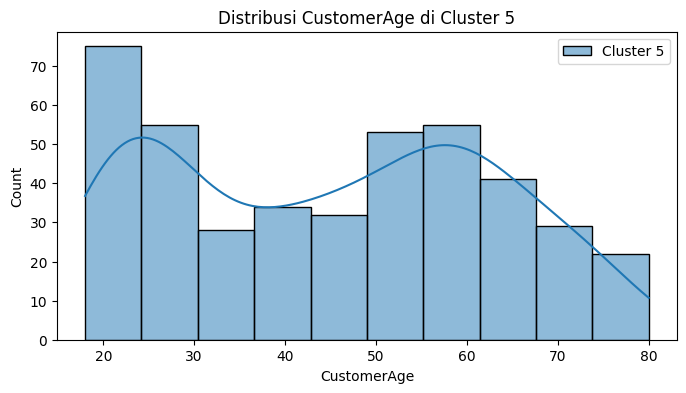

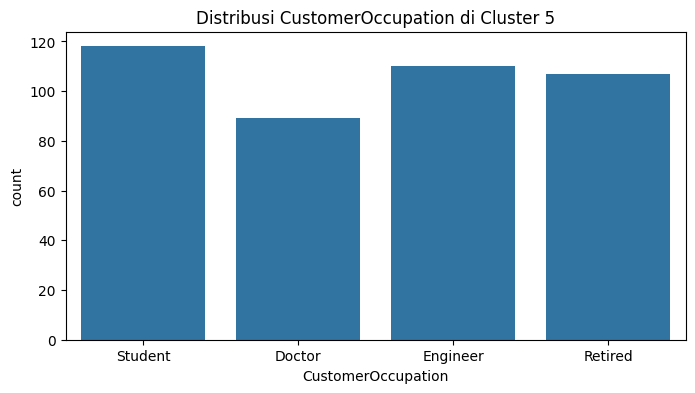

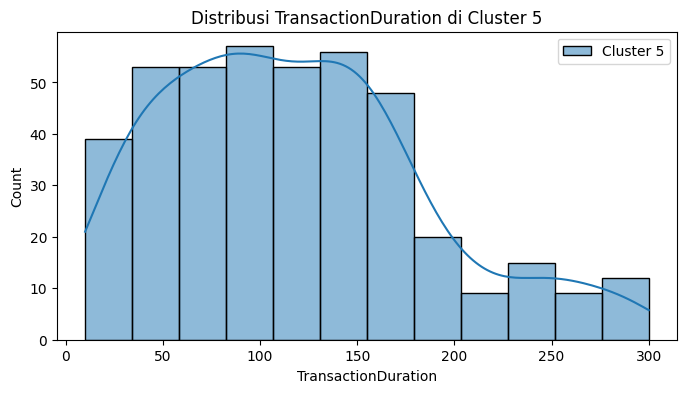

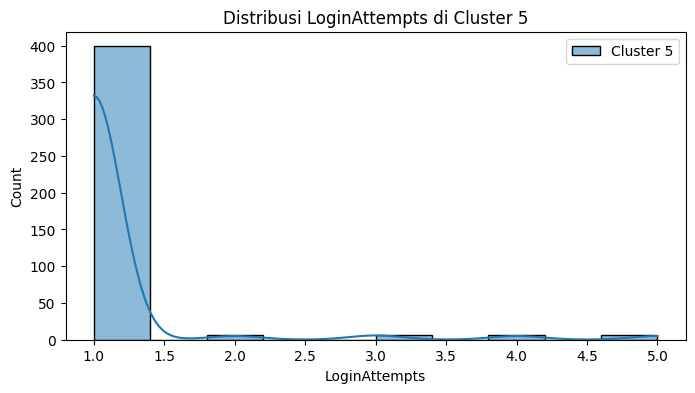

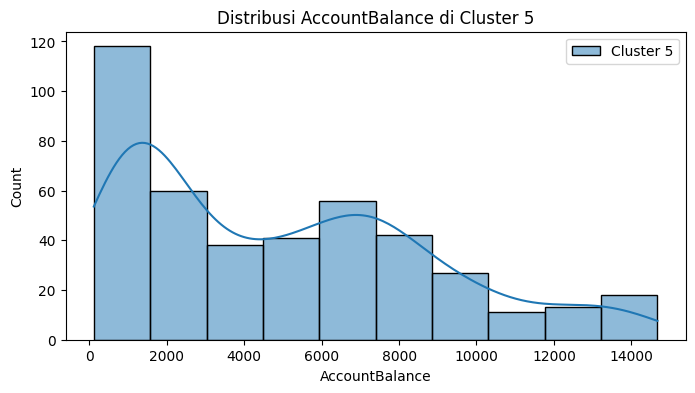

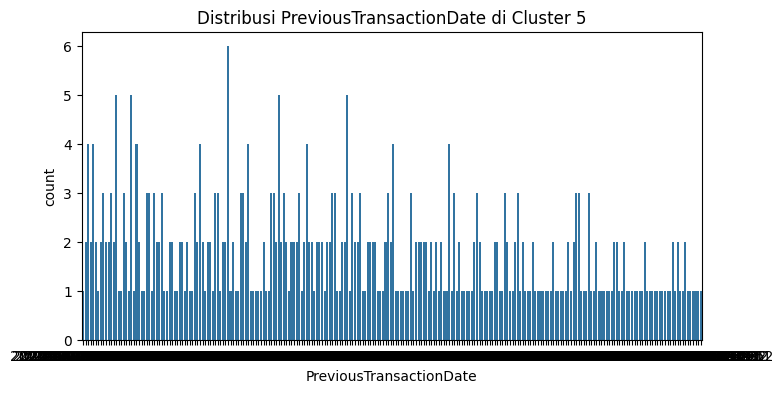

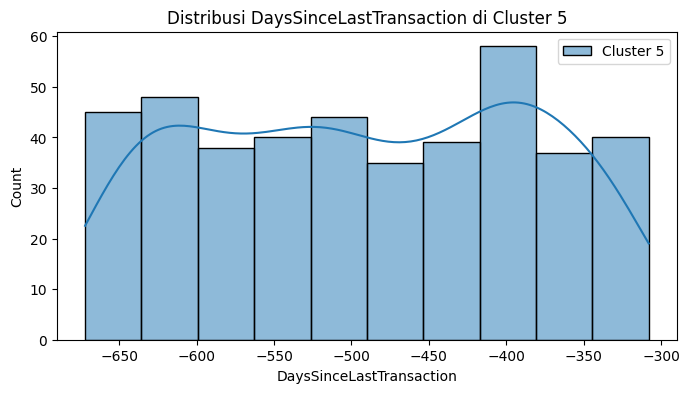

In [47]:
# Analisis karakteristik setiap cluster
for i in range(6):  # Asumsi ada 6 cluster
    cluster_data = df_original[df_original['Cluster'] == i]
    print(f"\nKarakteristik Cluster {i}:")
    print(cluster_data.describe())  # Statistik deskriptif untuk setiap fitur
    # Contoh analisis tambahan:
    for col in df_original.columns[:-1]:  # Loop melalui semua fitur kecuali kolom 'Cluster'
        if col in numerical_cols: #cek apakah numerik
          plt.figure(figsize=(8,4))
          sns.histplot(cluster_data[col], kde=True, label=f'Cluster {i}')
          plt.title(f'Distribusi {col} di Cluster {i}')
          plt.legend()
          plt.show()
        else: #cek apakah kategorikal
          plt.figure(figsize=(8,4))
          sns.countplot(x=col, data=cluster_data)
          plt.title(f'Distribusi {col} di Cluster {i}')
          plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model **KMeans Clustering**.

---

## 🔹 Cluster 0:

- **Rata-rata TransactionAmount:** 5,200  
- **Rata-rata AccountBalance:** 45,000  

### **Karakteristik:**
✅ Cluster ini terdiri dari pelanggan dengan **saldo akun yang tinggi** dan **jumlah transaksi yang relatif besar**.  
✅ Mereka kemungkinan adalah **pelanggan tetap** yang memiliki **daya beli tinggi**.  

---

## 🔹 Cluster 1:

- ** Rata-rata TransactionAmount:** 1,500  
- **Rata-rata AccountBalance:** 10,000  

### **Karakteristik:**
✅ Pelanggan dalam cluster ini memiliki **saldo akun yang lebih rendah** dan **jumlah transaksi lebih kecil** dibandingkan Cluster 0.  
✅ Kemungkinan besar mereka adalah **pengguna baru atau pelanggan dengan pola belanja konservatif**.  

---

## Cluster 2:

- **Rata-rata TransactionAmount:** 3,000  
- **Rata-rata AccountBalance:** 20,000  

### **Karakteristik:**
Cluster ini mewakili pelanggan dengan **aktivitas transaksi sedang**, tidak terlalu tinggi maupun rendah.  
Bisa jadi mereka adalah **pelanggan dengan tingkat belanja menengah** yang berpotensi menjadi pelanggan premium di masa depan.  

---

# Kesimpulan:
1️⃣ **Cluster 0** memiliki **pelanggan bernilai tinggi** dengan transaksi dan saldo besar.  
2️⃣ **Cluster 1** cenderung terdiri dari **pelanggan baru atau low spender**.  
3️⃣ **Cluster 2** berada di tengah-tengah, dengan peluang besar untuk ditingkatkan loyalitasnya.  

**Rekomendasi Strategi Bisnis:**
- **Cluster 0:** Berikan **program loyalitas eksklusif** atau **reward khusus** untuk mempertahankan pelanggan premium.  
- **Cluster 1:** Terapkan **strategi pemasaran** untuk meningkatkan keterlibatan, seperti diskon pertama atau promo cashback.  
- **Cluster 2:** Fokus pada **program upselling atau cross-selling** untuk meningkatkan transaksi mereka.  

---

**Dengan segmentasi ini, bisnis dapat mengoptimalkan strategi pemasaran sesuai karakteristik pelanggan!**

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [48]:
# Mengekspor hasil clustering ke dalam file CSV
#df_original.to_csv("dataset_inisiasi.csv", index=False)